# Does urbanization amplify warming trends?

### Is the frequency of days above the 90th percentile increasing? Are they increasing at a faster rate in Times Square?

In [322]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
#open csv files
adf = pd.read_csv("tmax_ardsley.csv")

tsdf = pd.read_csv("tmax_timesquare.csv")

In [323]:
# Pull out the Year Vector for Ardsley
ayrs = np.array(adf.Years)

# Pull out the rest of the data for Ardsley
atmax = np.array(adf.iloc[:,1:])

# Day of Year Vector for Ardsley
adoy=np.arange(1,366+1) #starts at day one, ends at day 366

In [217]:
# Pull out the Year Vector for Times Square
tsyrs = np.array(tsdf.Years)

# Pull out the rest of the data for Times Square
tstmax = np.array(tsdf.iloc[:,1:])

# Day of Year Vector for Times Square
tsdoy = np.arange(1,366+1) 

In [218]:
# Create a storage variable for our annual mean Tmax values
atmax_mean_allyrs = np.zeros((ayrs.size)) #size of yrs should = size of zeros


for i_ayrs in enumerate(ayrs):
    
    # Location of all data for the current year
    loc_ayrs = i_ayrs[0]

    #Pull out the temperature data for the current year
    atmax_ayrs = atmax[loc_ayrs,:]

    # Calculate the mean
    atmax_mean = np.nanmean(atmax_ayrs)
    
    # Store the current year estimate in our full array
    atmax_mean_allyrs[loc_ayrs]=atmax_mean
    

#Do the same for Times Square

atmaxJJA_1951to1980 = atmax_1951to1980[:,summer] #Ardsley summer temps 1951-1980
    
# Create a storage variable for our annual mean Tmax values
tstmax_mean_allyrs = np.zeros((tsyrs.size)) #size of yrs should = size of zeros


for i_tsyrs in enumerate(tsyrs):
    
    # Location of all data for the current year
    loc_tsyrs = i_tsyrs[0]
    
    #Pull out the temperature data for the current year
    tstmax_tsyrs = tstmax[loc_tsyrs,:]

    # Calculate the mean
    tstmax_mean = np.nanmean(tstmax_tsyrs)
    
    # Store the current year estimate in our full array
    tstmax_mean_allyrs[loc_tsyrs]=tstmax_mean

#how much warmer, inc in extreme heat days
#variability remains similar

atmax_mean_allyrs.shape

a_heatthresh_95 = np.percentile(np.ndarray.flatten(atmaxJJA_1951to1980),95)
ts_heatthresh_95 =  np.percentile(np.ndarray.flatten(tstmaxJJA_1951to1980),95)

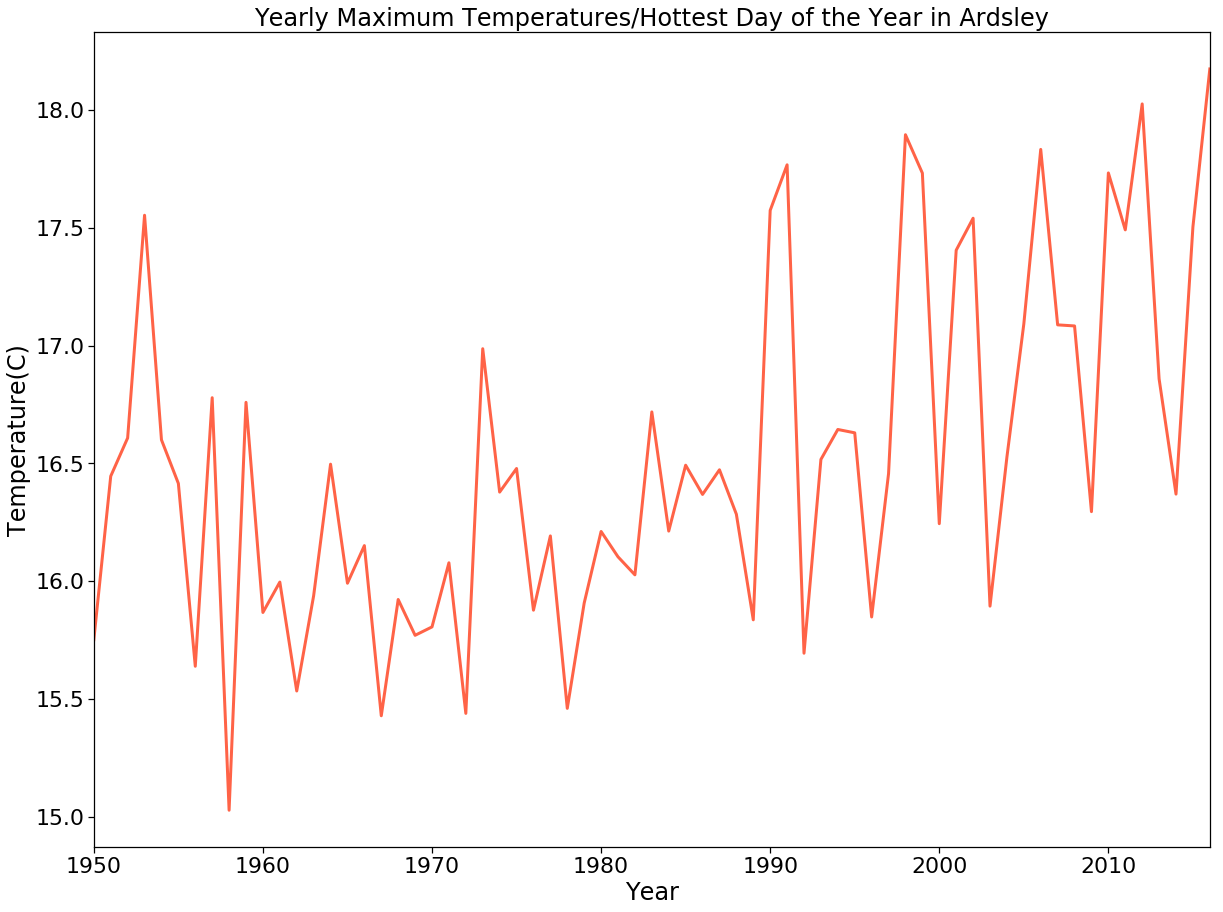

In [219]:
plt.figure(figsize=(20,15))
plt.xlim(1950,2016)
plt.plot(ayrs,atmax_mean_allyrs, color = 'tomato', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Temperature(C)')
plt.title('Yearly Maximum Temperatures/Hottest Day of the Year in Ardsley')

plt.savefig('a_hottestdoy.JPEG',format='jpeg')

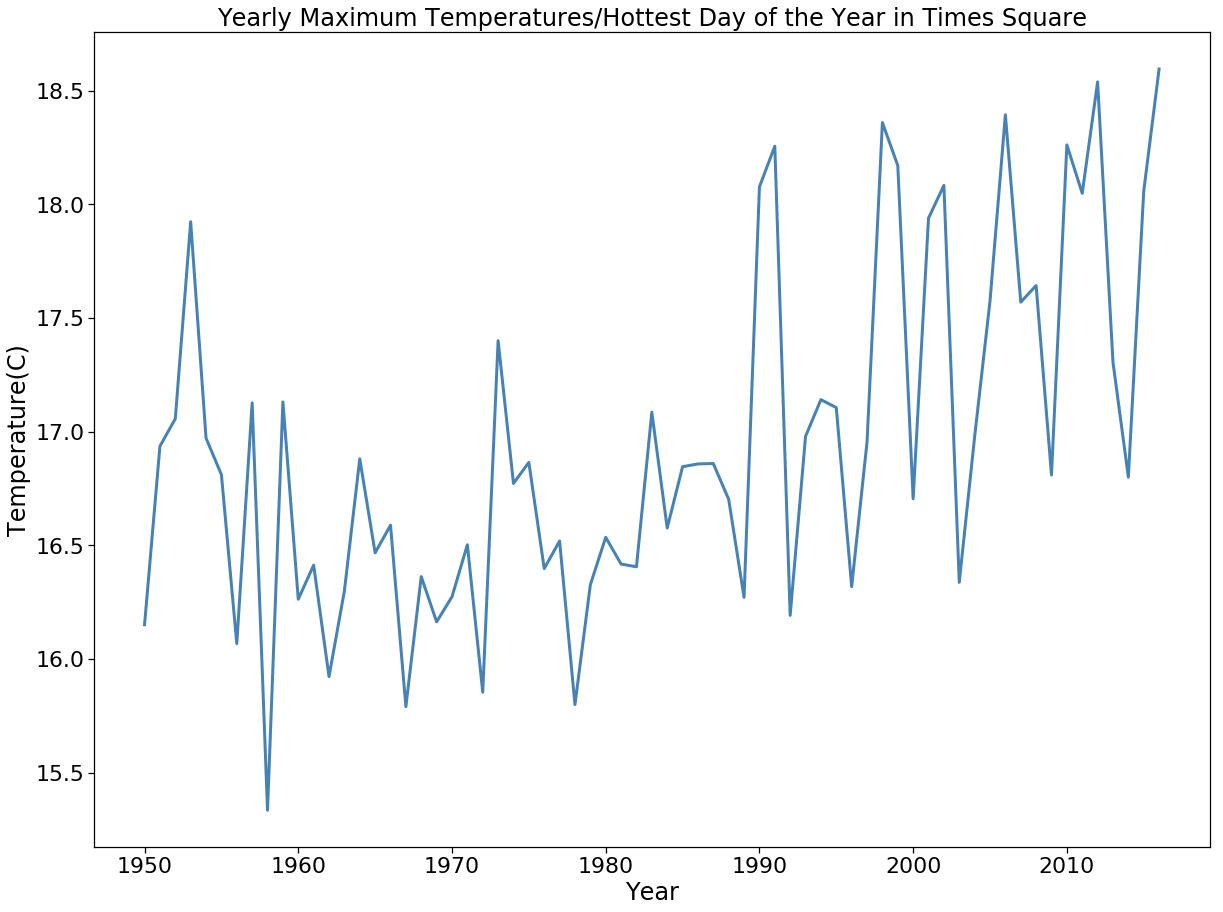

In [220]:
plt.figure(figsize=(20,15))
plt.plot(tsyrs,tstmax_mean_allyrs, color = 'steelblue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Temperature(C)')
plt.title('Yearly Maximum Temperatures/Hottest Day of the Year in Times Square')

plt.savefig('ts_hottestdoy.JPEG',format='jpeg')

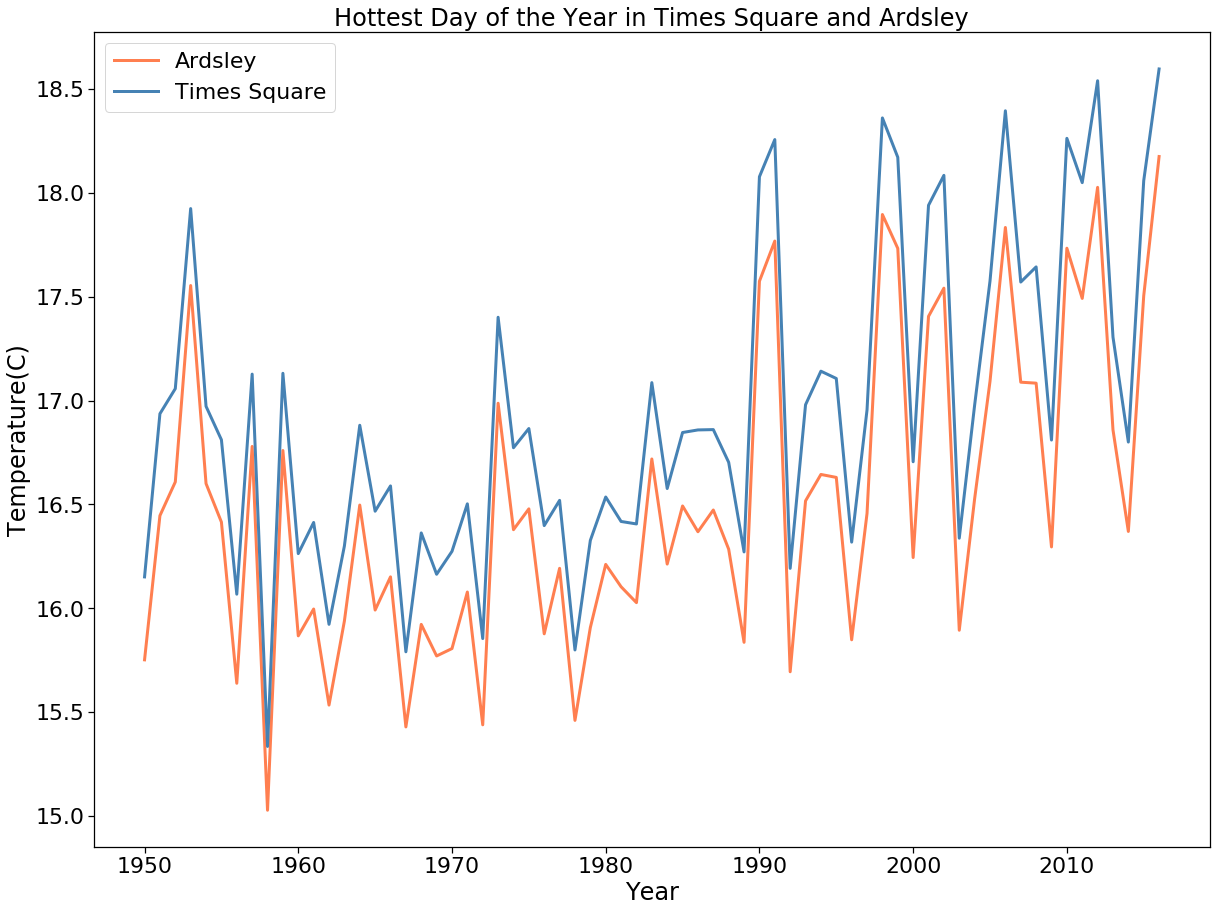

In [221]:
plt.figure(figsize=(20,15))
plt.plot(ayrs,atmax_mean_allyrs, color = 'coral', linewidth=3, label='Ardsley')
plt.plot(tsyrs,tstmax_mean_allyrs, color = 'steelblue', linewidth=3, label='Times Square')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Temperature(C)')
plt.title('Hottest Day of the Year in Times Square and Ardsley')

plt.savefig('both_hottestdoy.JPEG',format='jpeg')

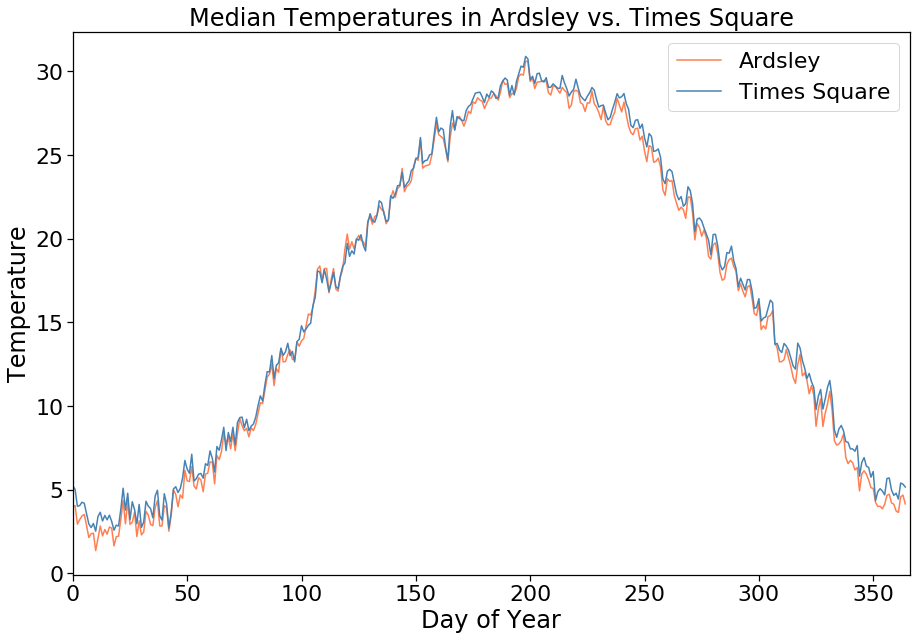

In [222]:
#for i_yr in enumerate(ayrs):
    
plt.figure(figsize=(15,10))
plt.plot(np.median(atmax,axis=0), label='Ardsley', color='coral')
plt.plot(np.median(tstmax,axis=0), label='Times Square', color='steelblue')
plt.legend()
plt.xlim(0,366)
plt.title('Median Temperatures in Ardsley vs. Times Square')
plt.xlabel('Day of Year')
plt.ylabel('Temperature')


plt.savefig('both_mediantemps.JPEG',format='jpeg')      


#is this even all yrs? or does the curr yr remain as the 1st given yr ????

# Isolate the years 1951-1980 and 1987-2016 and their summers

In [223]:
tsyrs
print(tstmax.shape)

# Find where years between 1951 and 1980
i_yr = np.where(  (tsyrs>=1951) & (tsyrs<=1980)    )[0]

# Find the rows in the tmax arrays that correspond to these years
tstmax_1951to1980 = tstmax[i_yr,:]

print(tstmax_1951to1980.shape)

#tstmax[i_yr,:].shape

a_yr  = np.where(  (ayrs>=1951) & (ayrs<=1980)    )[0] # 1951 - 1980
a_yr2 = np.where(  (ayrs>=1987) & (ayrs<=2016)    )[0] #1987 - 2016

# Tmax for Ardsley, two different time periods
tstmax_1951to1980 = tstmax[a_yr,:]
tstmax_1987to2016 = tstmax[a_yr2,:]


# Tmax for Ardsley, two different time periods
atmax_1951to1980 = atmax[a_yr,:]
atmax_1987to2016 = atmax[a_yr2,:]


(67, 366)
(30, 366)


In [224]:
# Pull out tmax for 1st and last day of summer to put in np.where
jun1=152; aug31=243

#use tsdoy & find temps between 119 and 243
summer = np.where(    (tsdoy>=jun1) & (tsdoy<=aug31)    )[0]

# Pull out just summer
atmaxJJA_1951to1980 = atmax_1951to1980[:,summer] #Ardsley summer temps 1951-1980

print(atmax_1951to1980.shape)
print(atmaxJJA_1951to1980.shape)
print(summer)

atmaxJJA_1987to2016 = atmax_1987to2016[:,summer] #Ardsley summer temps 1987-2016
 
tstmaxJJA_1951to1980 = tstmax_1951to1980[:,summer] #Times Square summer temperatures 1951-1980
tstmaxJJA_1987to2016 = tstmax_1987to2016[:,summer] #Times Square summer temperatures 1987-2016

# Calculate JJA average maximum daily temperatures for all years
tsmax_meanJJA = np.mean(tstmax[:,summer],axis=1)
atmax_meanJJA = np.mean(atmax[:,summer],axis=1)



(30, 366)
(30, 92)
[151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242]


In [225]:
tsmax_meanJJA.shape

print(tsmax_meanJJA)

[27.20456451 27.29228198 28.75934721 28.91086885 27.94130373 28.84760807
 27.21108638 28.51162989 26.91391236 28.07249942 27.43108635 27.90586901
 27.27902118 27.74249946 27.48782546 27.71119507 29.48010801 27.32043422
 27.88043433 27.60293415 28.0457602  28.19597767 26.68717335 28.46510804
 27.70554288 27.49119504 27.95478197 27.93260817 27.47749934 27.1406516
 28.81086897 28.15880365 26.82706473 29.30347762 27.88412979 27.06760815
 27.44565151 28.13173839 29.27510813 27.47499943 27.89315153 29.14489064
 26.67891247 29.20586895 28.83315161 29.11423843 27.29902118 28.11467324
 28.15793406 29.70771676 26.78586898 28.58902106 29.39728206 27.83760807
 27.36880365 29.73032551 28.75315146 28.35826022 29.22793403 27.2331515
 30.30891224 29.32173849 29.15184705 28.73782535 28.26815159 29.00673836
 29.82456454]


In [226]:
print(np.percentile(np.ndarray.flatten(tstmaxJJA_1951to1980),90)) #TS 90th percentile, 1951-1980
print(np.percentile(np.ndarray.flatten(tstmaxJJA_1987to2016),90)) #TS 90th percentile, 1987 to 2016
tstmaxJJA_1951to1980.shape #30 years, 92 days

31.939998626708984
32.830998229980466


(30, 92)


# Find sum of days above the 90th percentile/ sum of heat days for Times Square summers

In [227]:
thresh_90 = np.percentile(np.ndarray.flatten(tstmaxJJA_1951to1980),90)
print(thresh_90)
print('The 90th percentile threshold for Ardsley in celcius is ', thresh_90,' and converted to Fahrenheit it is', thresh_90*(9/5)+35)
#sum of numbers above the 90th percentile threshold in 1st time frame
#sum of numbers above the 90th percentile threshold in 1st time frame
print('The sum of days at or above the 90th percentile from 1951-1980 in Times Square is' , sum(i >=thresh_90 for i in np.ndarray.flatten(tstmaxJJA_1951to1980))) 

#sum of numbers above the 90th percentile threshold in 2nd time frame
print('The sum of days at or above the 90th percentile under that same threshold from 1987-2016 in Times Square is' ,sum(i >thresh_90 for i in np.ndarray.flatten(tstmaxJJA_1987to2016)))

31.939998626708984
The 90th percentile threshold for Ardsley in celcius is  31.939998626708984  and converted to Fahrenheit it is 92.49199752807618
The sum of days at or above the 90th percentile from 1951-1980 in Times Square is 277
The sum of days at or above the 90th percentile under that same threshold from 1987-2016 in Times Square is 442


In [228]:

a_above_thresh = np.where(i >= a_thresh_90 for i in atmaxJJA_1951to1980)

print(a_above_thresh)
print(a_thresh_90)
print(atmaxJJA_1951to1980)

(array([0]),)
31.480999565124513
[[30.21999931 28.26999855 25.97999954 ... 30.01000023 31.11999893
  30.1799984 ]
 [21.10000038 20.39999962 25.51999855 ... 26.93999863 29.05999947
  27.51000023]
 [23.15999985 24.45999908 24.72999954 ... 35.93000031 35.80999756
  36.43999863]
 ...
 [28.68999863 27.59999847 24.21999931 ... 30.07999992 28.23999977
  23.93999863]
 [26.38999939 23.75       19.5        ... 28.17000008 29.68999863
  28.51999855]
 [23.54999924 28.23999977 27.38999939 ... 32.90999985 28.51999855
  29.52999878]]


(array([0]),)


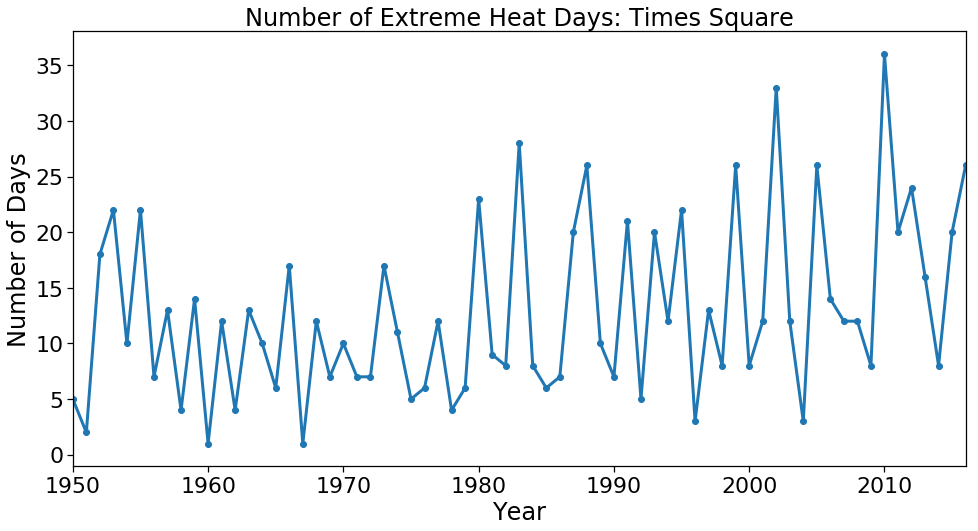

In [229]:
tsyrs = np.array(tsdf.Years)

# Create a storage array to hold the number of heat days
tsq_heatdays = np.zeros(tsyrs.size)
#print(tsq_heatdays)

# Create the for loop
for i_yr in enumerate(tsyrs):

    
    # Pull out current year temperatures
    curr_year = tstmax[i_yr[0],:]
    
    above_thresh = sum(i>=thresh_90 for i in curr_year)
    
    
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    tsq_heatdays[i_yr[0]] = above_thresh 
#loops through every year to make the storage array equal to the sum of days above thresh the value for each yr
    
    #print(a_above_thresh)
    #print(a_above_thresh.shape)
    #plt.plot(tsyrs, a_above_thresh)
   #np.sum(i>thresh_90 for i in curr_year)
 #plt.plot(tsyrs, tsq_abovethresh)
print(a_above_thresh)

plt.figure(figsize=(16,8))
sns.set_context("notebook",font_scale=2)
plt.plot(tsyrs,tsq_heatdays,linewidth=3)   #use as example
plt.scatter(tsyrs,tsq_heatdays)
plt.xlim(1950,2016)
plt.title('Number of Extreme Heat Days: Times Square')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.savefig('exhtdays_tq.pdf',format='pdf')


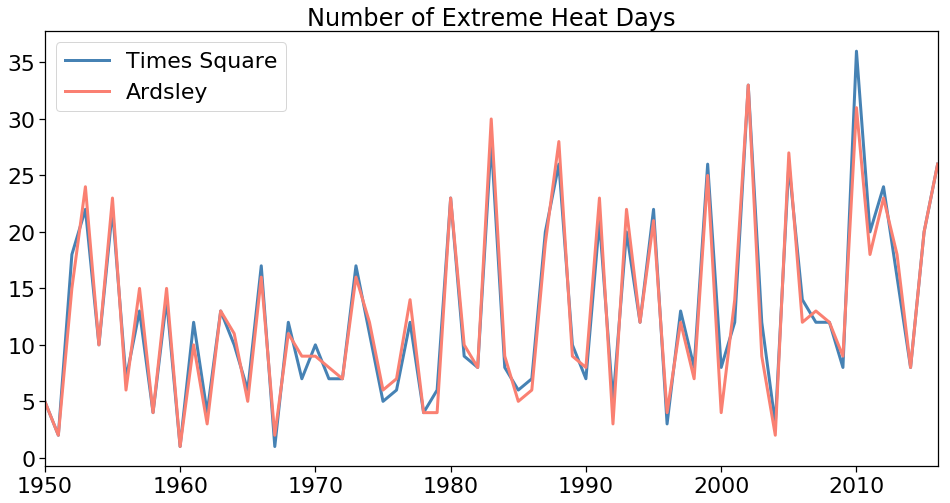

In [230]:
ayrs = np.array(adf.Years)

# Create a storage array to hold the number of heat days
a_heatdays = np.zeros(ayrs.size)
#print(tsq_heatdays)

# Create the for loop
for i_yr in enumerate(ayrs):

    
    # Pull out current year temperatures
    a_curr_year = atmax[i_yr[0],:]
    
    a_above_thresh = sum(i>=a_thresh_90 for i in a_curr_year)
    
    
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    a_heatdays[i_yr[0]] = a_above_thresh 
#loops through every year to make the storage array equal to the sum of days above thresh the value for each yr
    
#plt.figure(figsize=(15,8))
#plt.plot(ayrs,a_heatdays)
#plt.plot(ayrs,tsq_heatdays)

plt.figure(figsize=(16,8))
sns.set_context("notebook",font_scale=2)
plt.plot(tsyrs,tsq_heatdays,linewidth=3,color='steelblue',label='Times Square')
plt.plot(ayrs,a_heatdays,linewidth=3,color='salmon',label='Ardsley')
plt.legend()
plt.xlim(1950,2016)
plt.title('Number of Extreme Heat Days')
plt.savefig('exhtdays_both.pdf',format='pdf')

In [231]:
atmax

array([[ 4.75999975,  6.30999994, 12.86999989, ...,  4.63000011,
         3.57999992,         nan],
       [ 3.24000001,  6.05999994, 10.84999943, ...,  7.06999969,
         7.82999992,         nan],
       [ 9.17000008,  8.13999939,  3.5       , ...,  4.44999981,
         7.52999973,  2.54999995],
       ...,
       [-0.19      , -1.28999996, -6.5       , ...,  2.49000001,
         0.16      ,         nan],
       [ 2.28999996,  4.96000004,  4.57999992, ...,  6.48999977,
         8.17000008,         nan],
       [ 5.90999985,  4.03999996,  6.30999994, ...,  6.29999971,
         4.88999987,  6.10999966]])

Text(0.5, 1.0, 'Number of Extreme Heat Days')

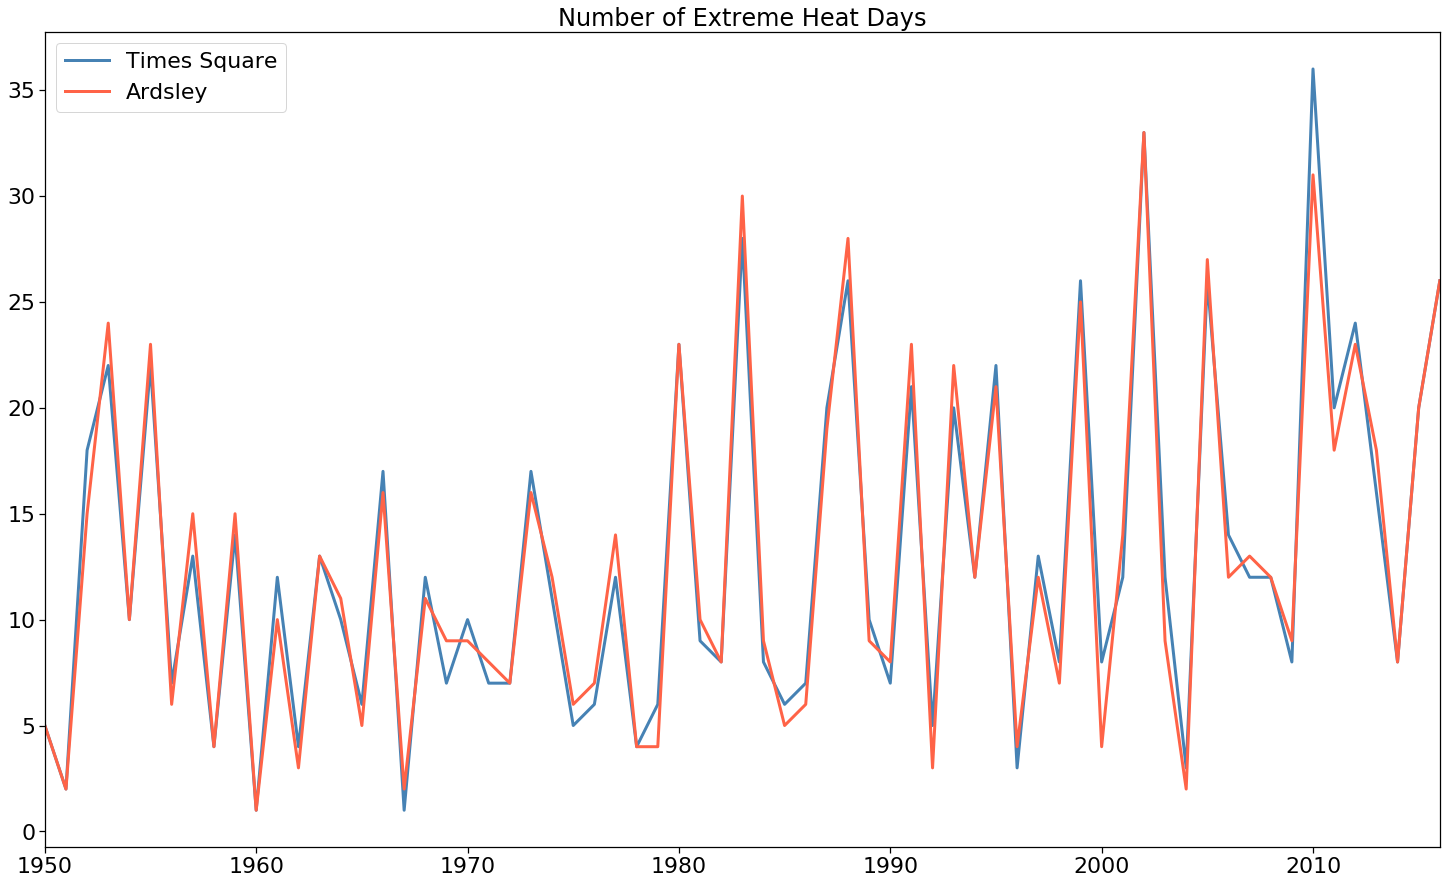

In [232]:
plt.figure(figsize=(25,15))
sns.set_context("notebook",font_scale=2)
plt.plot(tsyrs,tsq_heatdays,linewidth=3,color='steelblue',label='Times Square')
plt.plot(ayrs,a_heatdays,linewidth=3,color='tomato',label='Ardsley')
plt.legend()
plt.xlim(1950,2016)
plt.title('Number of Extreme Heat Days')
#plt.savefig('exhtdays_both.pdf',format='pdf')

In [233]:
#plt.plot(curr_year)
i_days = np.where(curr_year>=thresh_90)[0]
print(i_days)
print(curr_year[i_days])
print(i_days.size)
print(tsdoy[i_days])
print(np.min(tsdoy[i_days]))


[148 187 188 195 196 197 198 199 202 203 204 205 206 207 208 209 223 224
 225 226 227 238 241 252 253 257]
[32.22999954 33.38999939 32.57999802 32.20000076 32.80999756 32.79000092
 32.82999802 34.22999954 32.52000046 35.06999969 35.68999863 34.29999924
 34.38000107 32.95999908 33.04000092 33.88999939 34.04000092 34.77000046
 35.32999802 34.73999786 33.11000061 32.88000107 32.71999741 33.09000015
 32.         32.61999893]
26
[149 188 189 196 197 198 199 200 203 204 205 206 207 208 209 210 224 225
 226 227 228 239 242 253 254 258]
149


In [234]:
regstat_heatdays.slope

8.01840596844607

In [235]:
print(a_regstat_heatdays)

LinregressResult(slope=8.560186516115884, intercept=-225.5293364184028, rvalue=0.8809842084661187, pvalue=8.349507473396261e-23, stderr=0.5702342447567537)


# Find the number of days above the threshold for each year

[ 5.  2. 18. 22. 10. 22.  7. 13.  4. 14.  1. 12.  4. 13. 10.  6. 17.  1.
 12.  7. 10.  7.  7. 17. 11.  5.  6. 12.  4.  6. 23.  9.  8. 28.  8.  6.
  7. 20. 26. 10.  7. 21.  5. 20. 12. 22.  3. 13.  8. 26.  8. 12. 33. 12.
  3. 26. 14. 12. 12.  8. 36. 20. 24. 16.  8. 20. 26.]


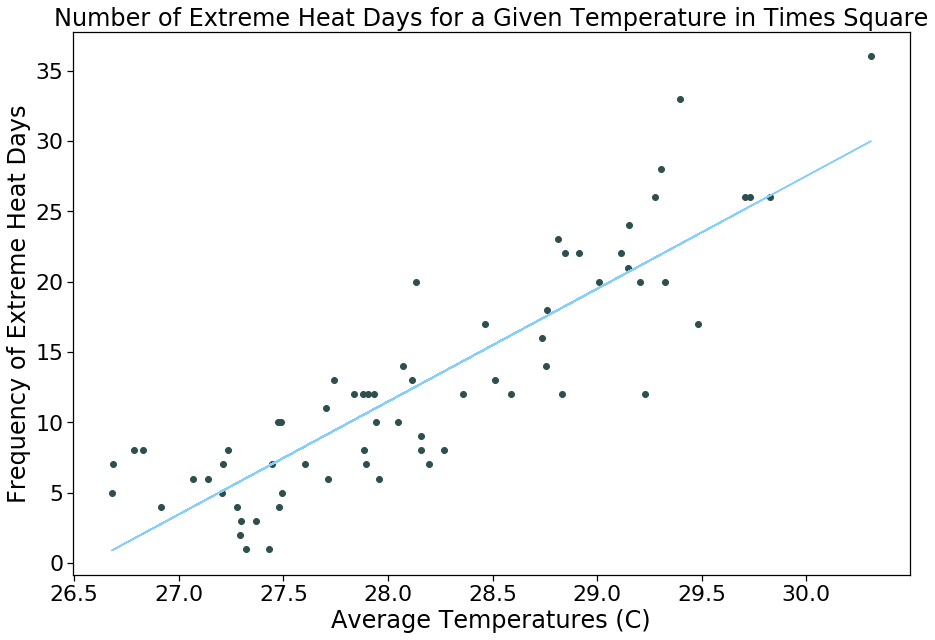

In [236]:
ts_firstday_above_threshold = np.zeros((tsyrs.size))

for i_yr in enumerate(tsyrs):
    curr_year = tstmax[i_yr[0],:]

    i_days = np.where(curr_year>=thresh_90)[0]
    
    #find location of i_days
    
    day1_above_thresh = (tsdoy[i_days])
    
    #day1_above_thresh[i_yr[0]] = i_days
    ts_firstday_above_threshold[i_yr[0]] = np.min(day1_above_thresh)
    
#plt.plot(tsyrs, above_threshold_allyrs)
    
#x-yr y-doy day above threshold first falls on  

regstat_heatdays = stats.linregress(tsmax_meanJJA,tsq_heatdays)

fit_line = (regstat_heatdays.slope*tsmax_meanJJA)+regstat_heatdays.intercept

tsmax_meanJJA = np.mean(tstmax[:,summer],axis=1)
plt.figure(figsize=(15,10))
plt.title('Number of Extreme Heat Days for a Given Temperature in Times Square')
plt.ylabel('Frequency of Extreme Heat Days') # for a given average temperature, how many extreme heat days were there
plt.xlabel('Average Temperatures (C)')
plt.scatter(tsmax_meanJJA,tsq_heatdays, color='darkslategray')
plt.plot(tsmax_meanJJA,fit_line, color='lightskyblue')
plt.savefig('ts_firstdayabovethresh.JPEG',format='jpeg')



#print(tsq_heatdays)
#shows that in more recent years, number of heat days increases
#average summer temps plotted 

In [237]:
print(tsmax_meanJJA)

[27.20456451 27.29228198 28.75934721 28.91086885 27.94130373 28.84760807
 27.21108638 28.51162989 26.91391236 28.07249942 27.43108635 27.90586901
 27.27902118 27.74249946 27.48782546 27.71119507 29.48010801 27.32043422
 27.88043433 27.60293415 28.0457602  28.19597767 26.68717335 28.46510804
 27.70554288 27.49119504 27.95478197 27.93260817 27.47749934 27.1406516
 28.81086897 28.15880365 26.82706473 29.30347762 27.88412979 27.06760815
 27.44565151 28.13173839 29.27510813 27.47499943 27.89315153 29.14489064
 26.67891247 29.20586895 28.83315161 29.11423843 27.29902118 28.11467324
 28.15793406 29.70771676 26.78586898 28.58902106 29.39728206 27.83760807
 27.36880365 29.73032551 28.75315146 28.35826022 29.22793403 27.2331515
 30.30891224 29.32173849 29.15184705 28.73782535 28.26815159 29.00673836
 29.82456454]


## Find estimate of number of heat days for a given temperature

In [238]:


est_heatdays = (regstat_heatdays.slope*28.81657795161655)+regstat_heatdays.intercept
print(est_heatdays)


18.018294068772803


In [239]:
tstmax_mean
regstat_heatdays.rvalue**2 #shows percent variation in data,
#closer to 100 better

0.7654642853723708

## Run a linear regression between TmaxJJA and # heat days for times square

In [240]:
print(stats.linregress(tsmax_meanJJA,tsq_heatdays))
print(tsmax_meanJJA)
print(0.8749081**2)




LinregressResult(slope=8.01840596844607, intercept=-213.04472656866076, rvalue=0.8749081582499793, pvalue=3.8166123495509788e-22, stderr=0.5505203646503511)
[27.20456451 27.29228198 28.75934721 28.91086885 27.94130373 28.84760807
 27.21108638 28.51162989 26.91391236 28.07249942 27.43108635 27.90586901
 27.27902118 27.74249946 27.48782546 27.71119507 29.48010801 27.32043422
 27.88043433 27.60293415 28.0457602  28.19597767 26.68717335 28.46510804
 27.70554288 27.49119504 27.95478197 27.93260817 27.47749934 27.1406516
 28.81086897 28.15880365 26.82706473 29.30347762 27.88412979 27.06760815
 27.44565151 28.13173839 29.27510813 27.47499943 27.89315153 29.14489064
 26.67891247 29.20586895 28.83315161 29.11423843 27.29902118 28.11467324
 28.15793406 29.70771676 26.78586898 28.58902106 29.39728206 27.83760807
 27.36880365 29.73032551 28.75315146 28.35826022 29.22793403 27.2331515
 30.30891224 29.32173849 29.15184705 28.73782535 28.26815159 29.00673836
 29.82456454]
0.76546418344561


## Run a linear regression between AmaxJJA and heat days for Ardsley

In [241]:
amax_meanJJA = np.mean(atmax[:,summer],axis=1)

print(stats.linregress(amax_meanJJA,a_heatdays))

print(0.8809842**2)


LinregressResult(slope=8.560186516115884, intercept=-225.5293364184028, rvalue=0.8809842084661187, pvalue=8.349507473396261e-23, stderr=0.5702342447567537)
0.77613316064964


In [242]:
#loop though each year to find number of days in each year that fall above the threshold
#tstmax.shape

#for line in tstmax:
   # above_thresh = sum(i >=thresh_90 for i in tstmax)
   # print(above_thresh)

#print(tstmax)
print(above_thresh.shape)
print(tstmax.shape)

print(amax_meanJJA)

()
(67, 366)
[26.89043427 26.99728199 28.42293412 28.75967328 27.70032549 28.56706449
 27.0524994  28.24239061 26.70206466 27.83402117 27.12782557 27.61108624
 27.00184716 27.3291298  27.16076026 27.27315163 29.11891239 27.15086889
 27.5881516  27.37173856 27.75097779 27.98793411 26.35652109 28.18793421
 27.52815155 27.27739071 27.41391248 27.7244559  27.37260808 26.88097759
 28.51532536 28.04043415 26.58315156 29.07858633 27.7002169  26.85684722
 26.92249941 27.75119506 28.84869495 27.04293415 27.45380383 28.7970647
 26.24249946 28.84989061 28.30912982 28.83249938 27.02412987 27.75847758
 27.8134776  29.33510807 26.44097761 28.06597761 28.94456463 27.42662988
 27.07967333 29.35336884 28.19641238 28.11347764 28.66217313 26.81652113
 29.63912972 28.63739063 28.64804282 28.35217322 27.9508689  28.54391239
 29.48945578]


# Find number of days above the threshold for Ardsley

[147 149 188 189 196 197 198 199 200 203 204 205 206 207 208 209 210 224
 225 226 227 228 239 242 253 258]
X axis [26.89043427 26.99728199 28.42293412 28.75967328 27.70032549 28.56706449
 27.0524994  28.24239061 26.70206466 27.83402117 27.12782557 27.61108624
 27.00184716 27.3291298  27.16076026 27.27315163 29.11891239 27.15086889
 27.5881516  27.37173856 27.75097779 27.98793411 26.35652109 28.18793421
 27.52815155 27.27739071 27.41391248 27.7244559  27.37260808 26.88097759
 28.51532536 28.04043415 26.58315156 29.07858633 27.7002169  26.85684722
 26.92249941 27.75119506 28.84869495 27.04293415 27.45380383 28.7970647
 26.24249946 28.84989061 28.30912982 28.83249938 27.02412987 27.75847758
 27.8134776  29.33510807 26.44097761 28.06597761 28.94456463 27.42662988
 27.07967333 29.35336884 28.19641238 28.11347764 28.66217313 26.81652113
 29.63912972 28.63739063 28.64804282 28.35217322 27.9508689  28.54391239
 29.48945578]
(67, 92)
(67,)


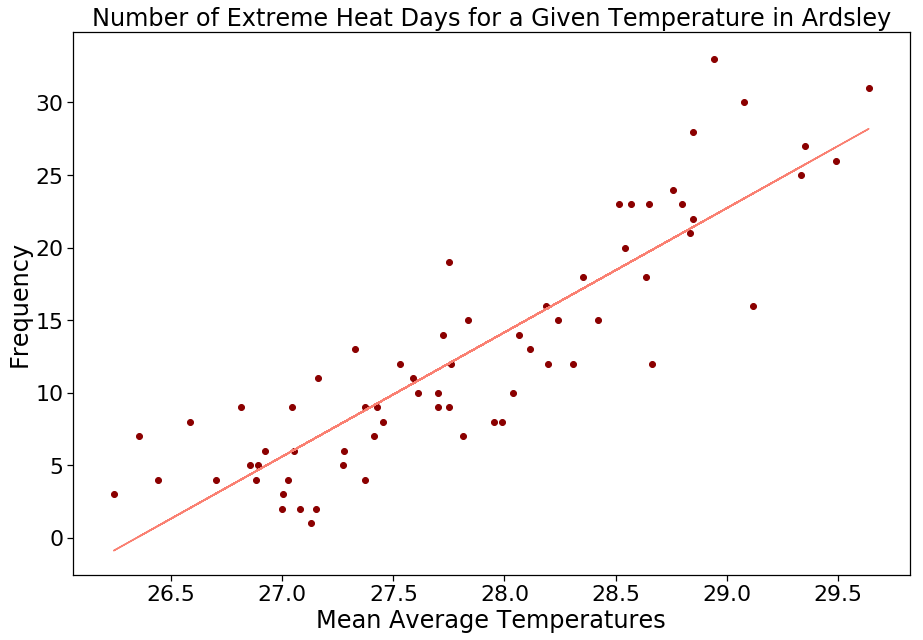

In [331]:
a_firstday_above_threshold = np.zeros((ayrs.size)) #storage array

for i_yr in enumerate(ayrs):
    a_curr_year = atmax[i_yr[0],:]

    a_i_days = np.where(curr_year>=a_thresh_90)[0]
    
    #find location of i_days
    
    a_day1_above_thresh = (adoy[a_i_days])
    
    #day1_above_thresh[i_yr[0]] = i_days
    a_firstday_above_threshold[i_yr[0]] = np.min(a_day1_above_thresh) #using the indexing of the years, 
    
#plt.plot(tsyrs, above_threshold_allyrs)
    
#x-yr y-doy day above threshold falls on  

a_regstat_heatdays = stats.linregress(amax_meanJJA,a_heatdays)

a_fit_line = (a_regstat_heatdays.slope*amax_meanJJA)+a_regstat_heatdays.intercept

amax_meanJJA = np.mean(atmax[:,summer],axis=1) #for all the summer months
plt.figure(figsize=(15,10))
plt.title('Number of Extreme Heat Days for a Given Temperature in Ardsley')
plt.ylabel('Frequency')
plt.xlabel('Mean Average Temperatures')

plt.plot(amax_meanJJA,a_fit_line, color='salmon')
plt.scatter(amax_meanJJA,a_heatdays, color='darkred')
plt.savefig('ard_firstdayabovethresh.JPEG',format='jpeg')
print(a_day1_above_thresh)
print("X axis",amax_meanJJA)
#both x and y have same dimensions
print(atmax[:,summer].shape)

print(amax_meanJJA.shape)

In [244]:
a_regstat_heatdays.slope

8.560186516115884

# How have the duration and intensity of heat waves changed overtime?

## Find sum of days above the 90th percentile for Ardsley summers for each timeframe

In [245]:
# Find number of days with temperatures above the 90th percentile in Ardsley
#print(np.ndarray.flatten(tstmaxJJA_1951to1980, 90))

a_thresh_90 = np.percentile(np.ndarray.flatten(atmaxJJA_1951to1980),90)
print(a_thresh_90)
print('The 90th percentile threshold for Ardsley in celcius is ', a_thresh_90,' and converted to Fahrenheit it is', a_thresh_90*(9/5)+35)
#sum of numbers above the 90th percentile threshold in 1st time frame
print('The sum of all days above the 90th threshold in Ardsley from 1951 to 1980 is', sum(i >a_thresh_90 for i in np.ndarray.flatten(atmaxJJA_1951to1980))) 

#sum of numbers above the 90th percentile threshold in 2nd time frame
print('The sum of all days above the 90th percentile under that same threshold in Ardsley from 1987-2016 is', sum(i >a_thresh_90 for i in np.ndarray.flatten(atmaxJJA_1987to2016)))

31.480999565124513
The 90th percentile threshold for Ardsley in celcius is  31.480999565124513  and converted to Fahrenheit it is 91.66579921722413
The sum of all days above the 90th threshold in Ardsley from 1951 to 1980 is 276
The sum of all days above the 90th percentile under that same threshold in Ardsley from 1987-2016 is 426


In [334]:
#1951-1980: 276 → 426, 342 → 544
#change in exhd 150, 202 ; ards & tsq respectively


## Find sum of days above the 90th percentile for Times Square summers for each timeframe

In [333]:
print(thresh_90)

# sum of days above 90 thresh

print('The sum of all days above the 90th threshold in Times Square from 1951 to 1980 is', sum(i >a_thresh_90 for i in np.ndarray.flatten(tstmaxJJA_1951to1980))) 

print('The sum of all days above the 90th percentile under that same threshold in Ardsley from 1987-2016 is', sum(i >a_thresh_90 for i in np.ndarray.flatten(tstmaxJJA_1987to2016)))

31.939998626708984
The sum of all days above the 90th threshold in Times Square from 1951 to 1980 is 342
The sum of all days above the 90th percentile under that same threshold in Ardsley from 1987-2016 is 544


## Find sum of days above 90th percentile for both locations

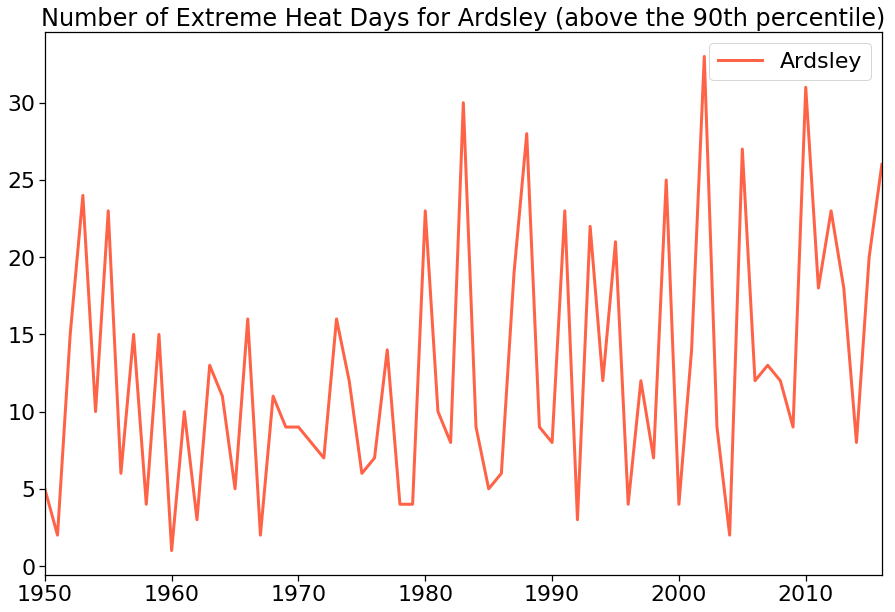

In [247]:
plt.figure(figsize=(15,10))
plt.plot(ayrs,a_heatdays,linewidth=3,color='tomato',label='Ardsley')
plt.xlim(1950,2016)
plt.title('Number of Extreme Heat Days for Ardsley (above the 90th percentile)')
plt.legend()
plt.savefig('a_exheatdays_90.pdf',format='pdf')

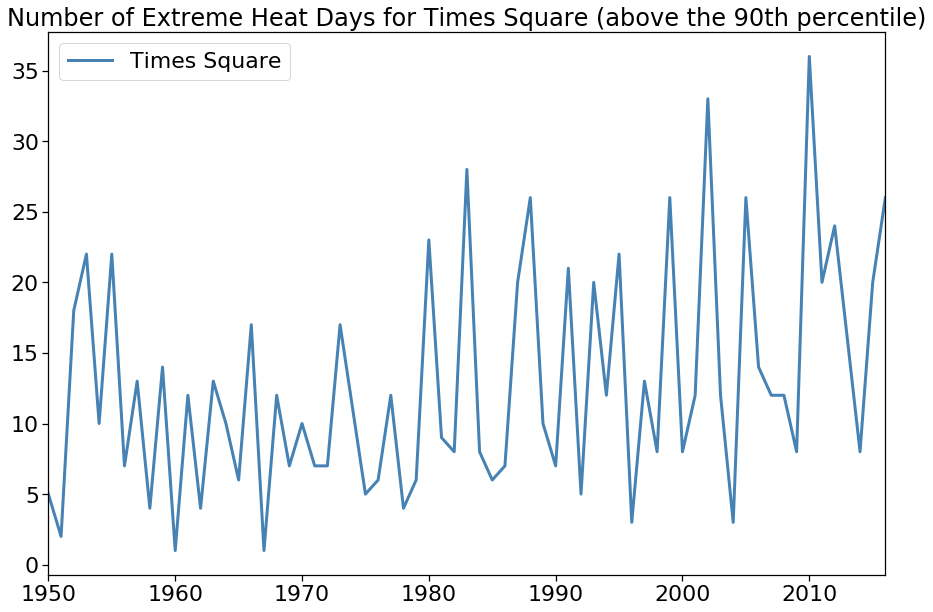

In [248]:
plt.figure(figsize=(15,10))
plt.plot(tsyrs,tsq_heatdays,linewidth=3,color='steelblue',label='Times Square')
plt.xlim(1950,2016)
plt.legend()
plt.title('Number of Extreme Heat Days for Times Square (above the 90th percentile)')
plt.savefig('tss_exheatdays_90.pdf',format='pdf')

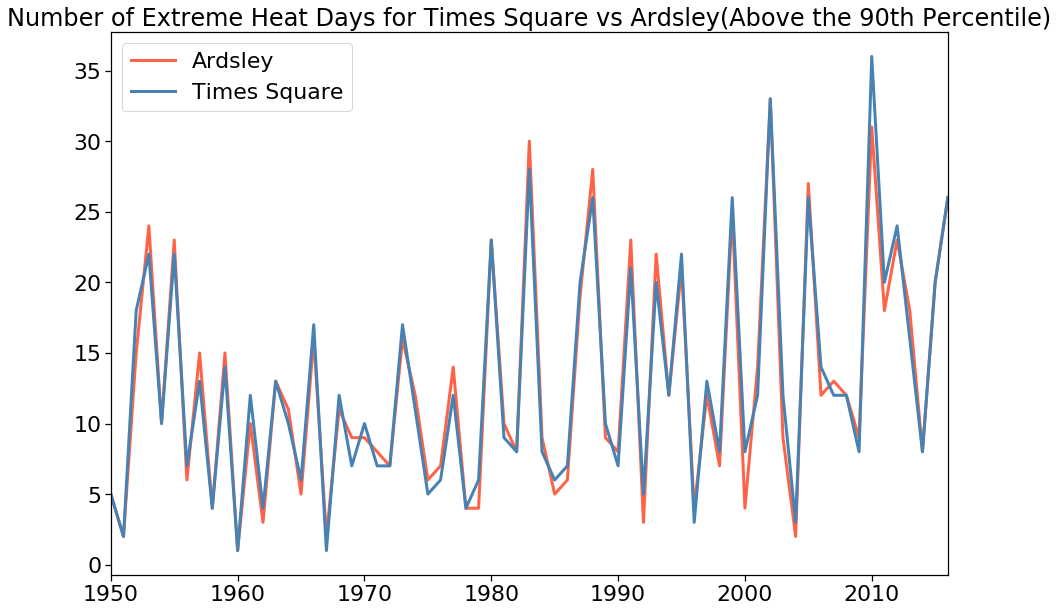

In [249]:
plt.figure(figsize=(15,10))
plt.xlim(1950,2016)
plt.plot(ayrs,a_heatdays,linewidth=3,color='tomato',label='Ardsley')

plt.plot(tsyrs,tsq_heatdays,linewidth=3,color='steelblue',label='Times Square')
plt.legend()
plt.title('Number of Extreme Heat Days for Times Square vs Ardsley(Above the 90th Percentile)')
plt.savefig('bothh_exheatdays_90.pdf',format='pdf')

## Find sum of days above the 95th percentile for both locations

In [250]:
a_heatthresh_95 = np.percentile(np.ndarray.flatten(atmaxJJA_1951to1980),95)
ts_heatthresh_95 =  np.percentile(np.ndarray.flatten(tstmaxJJA_1951to1980),95)

In [251]:
tsyrs = np.array(tsdf.Years)

# Create a storage array to hold the number of heat days
tsq_heatdays_95 = np.zeros(tsyrs.size)
#print(tsq_heatdays)

# Create the for loop
for i_yr in enumerate(tsyrs):

    
    # Pull out current year temperatures
    curr_year = tstmax[i_yr[0],:]
    
    above_thresh_95 = sum(i>=ts_heatthresh_95 for i in curr_year)
    
    
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    tsq_heatdays_95[i_yr[0]] = above_thresh_95 
#loops through every year to make the storage array equal to the sum of days above thresh the value for each yr
    

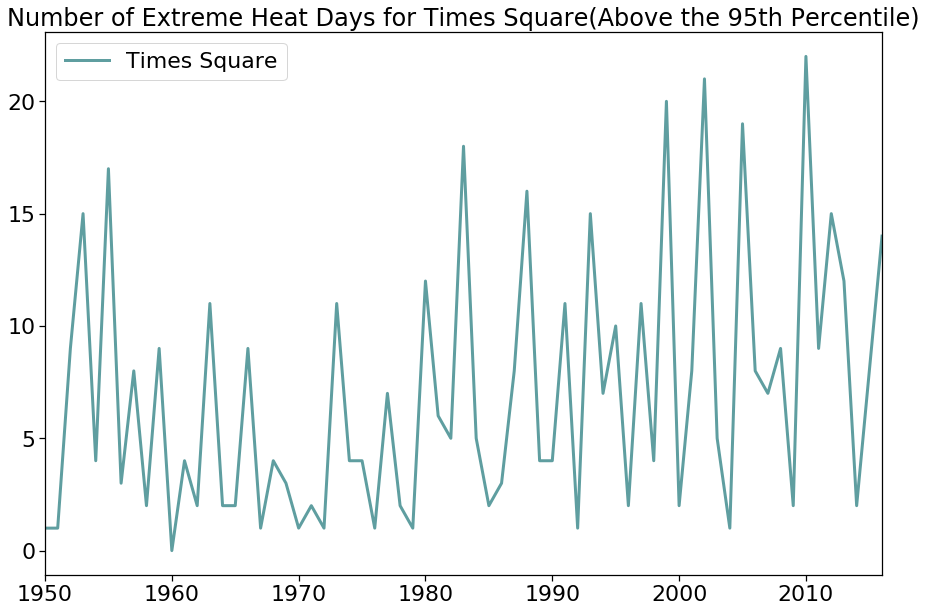

In [252]:
plt.figure(figsize=(15,10))
plt.xlim(1950,2016)
plt.plot(tsyrs,tsq_heatdays_95,linewidth=3,color='cadetblue',label='Times Square')
plt.legend()
plt.title('Number of Extreme Heat Days for Times Square(Above the 95th Percentile)')
plt.savefig('ts_above95.JPEG',format='jpeg')

In [253]:
ayrs = np.array(adf.Years)

# Create a storage array to hold the number of heat days
a_heatdays_95 = np.zeros(tsyrs.size)
#print(tsq_heatdays)

# Create the for loop
for i_yr in enumerate(ayrs):
    
    # Pull out current year temperatures
    curr_year = atmax[i_yr[0],:]
    
    a_above_thresh_95 = sum(i>=a_heatthresh_95 for i in curr_year)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    a_heatdays_95[i_yr[0]] = a_above_thresh_95 #replace zeros w values
#loops through every year to make the storage array equal to the sum of days above thresh the value for each yr
    

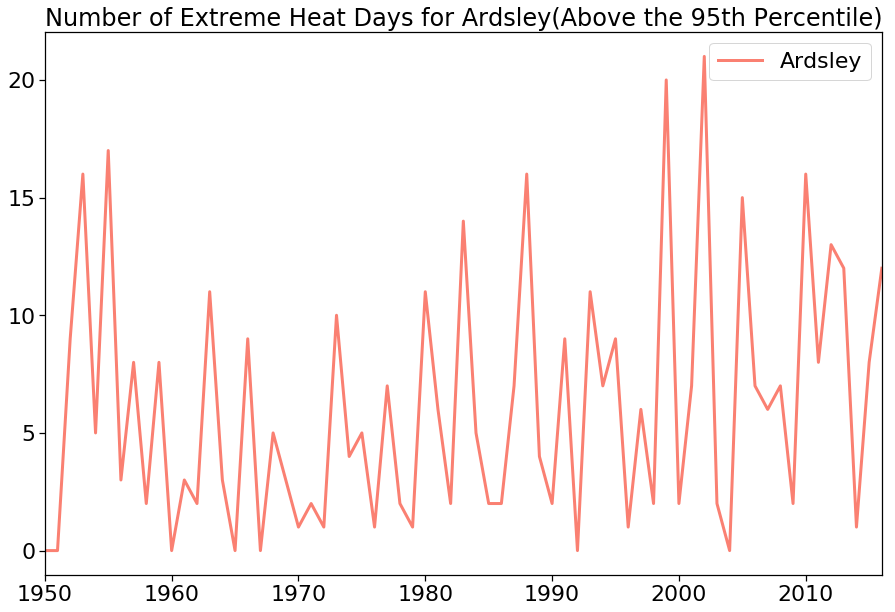

In [254]:
plt.figure(figsize=(15,10))
plt.xlim(1950,2016)
plt.plot(ayrs,a_heatdays_95,linewidth=3,color='salmon',label='Ardsley')
plt.legend()
plt.title('Number of Extreme Heat Days for Ardsley(Above the 95th Percentile)')
plt.savefig('a_above95.JPEG',format='jpeg')

In [255]:
a_heatdays_95

array([ 0.,  0.,  9., 16.,  5., 17.,  3.,  8.,  2.,  8.,  0.,  3.,  2.,
       11.,  3.,  0.,  9.,  0.,  5.,  3.,  1.,  2.,  1., 10.,  4.,  5.,
        1.,  7.,  2.,  1., 11.,  6.,  2., 14.,  5.,  2.,  2.,  7., 16.,
        4.,  2.,  9.,  0., 11.,  7.,  9.,  1.,  6.,  2., 20.,  2.,  7.,
       21.,  2.,  0., 15.,  7.,  6.,  7.,  2., 16.,  8., 13., 12.,  1.,
        8., 12.])

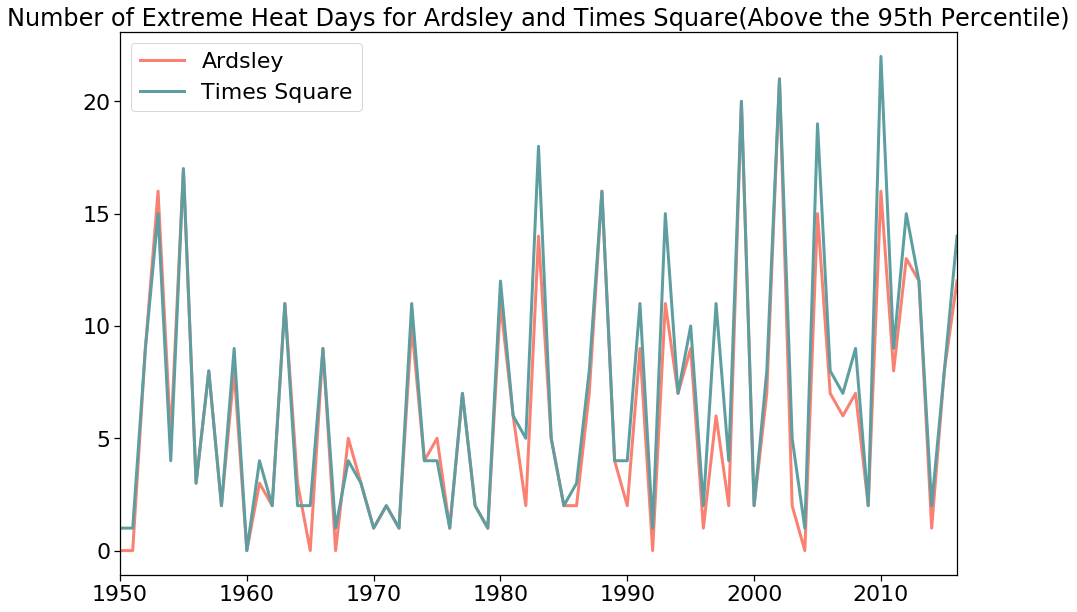

In [256]:
plt.figure(figsize=(15,10))
plt.xlim(1950,2016)

plt.plot(ayrs,a_heatdays_95,linewidth=3,color='salmon',label='Ardsley')
plt.plot(tsyrs,tsq_heatdays_95,linewidth=3,color='cadetblue',label='Times Square')
plt.legend()
plt.title('Number of Extreme Heat Days for Ardsley and Times Square(Above the 95th Percentile)')
plt.savefig('both_hottestdoy95.JPEG',format='jpeg')

# First heat day of the year for Times Square and Ardsley

In [257]:
#plt.xlabel('Number of Days')
#plt.ylabel('Summer Maximum Temperatures (C)')



## Find daily maximum temperatures for all years

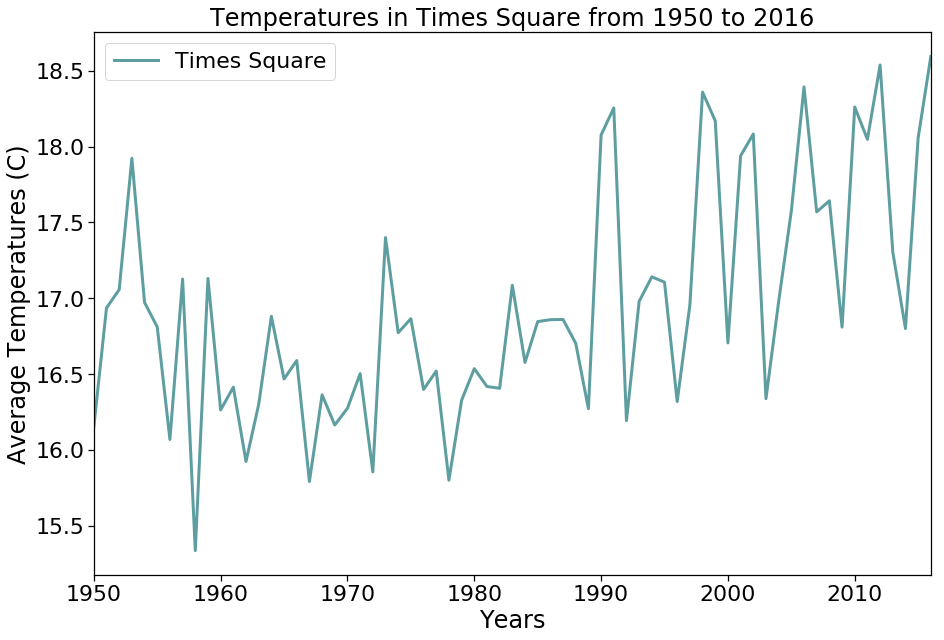

In [258]:
# Create a storage variable for our annual mean Tmax values
atmax_mean_allyrs = np.zeros((ayrs.size)) #size of yrs should = size of zeros


for i_ayrs in enumerate(ayrs):
    
    # Location of all data for the current year
    loc_ayrs = i_ayrs[0]

    #Pull out the temperature data for the current year
    atmax_ayrs = atmax[loc_ayrs,:]

    # Calculate the mean
    atmax_mean = np.nanmean(atmax_ayrs)
    
    # Store the current year estimate in our full array
    atmax_mean_allyrs[loc_ayrs]=atmax_mean
    

#Do the same for Times Square

    
# Create a storage variable for our annual mean Tmax values
tstmax_mean_allyrs = np.zeros((tsyrs.size)) #size of yrs should = size of zeros


for i_tsyrs in enumerate(tsyrs):
    
    # Location of all data for the current year
    loc_tsyrs = i_tsyrs[0]
    
    #Pull out the temperature data for the current year
    tstmax_tsyrs = tstmax[loc_tsyrs,:]

    # Calculate the mean
    tstmax_mean = np.nanmean(tstmax_tsyrs)
    
    # Store the current year estimate in our full array
    tstmax_mean_allyrs[loc_tsyrs]=tstmax_mean

    
# Find max temperatures, store in an array , and plot it



plt.figure(figsize=(15,10))
plt.plot(tsyrs,tstmax_mean_allyrs,linewidth=3,color='cadetblue',label='Times Square')
plt.legend()
plt.xlim(1950,2016)
plt.ylabel('Average Temperatures (C)')
plt.xlabel('Years')
plt.title('Temperatures in Times Square from 1950 to 2016')
plt.savefig('ts_tempsallyrs.JPEG',format='jpeg')

#number of days in Ardsley above 85 and number of days in Times Square above 85
#x - years for each year number of days above 85
#how much warmer, inc in extreme heat days
#variability remains similar

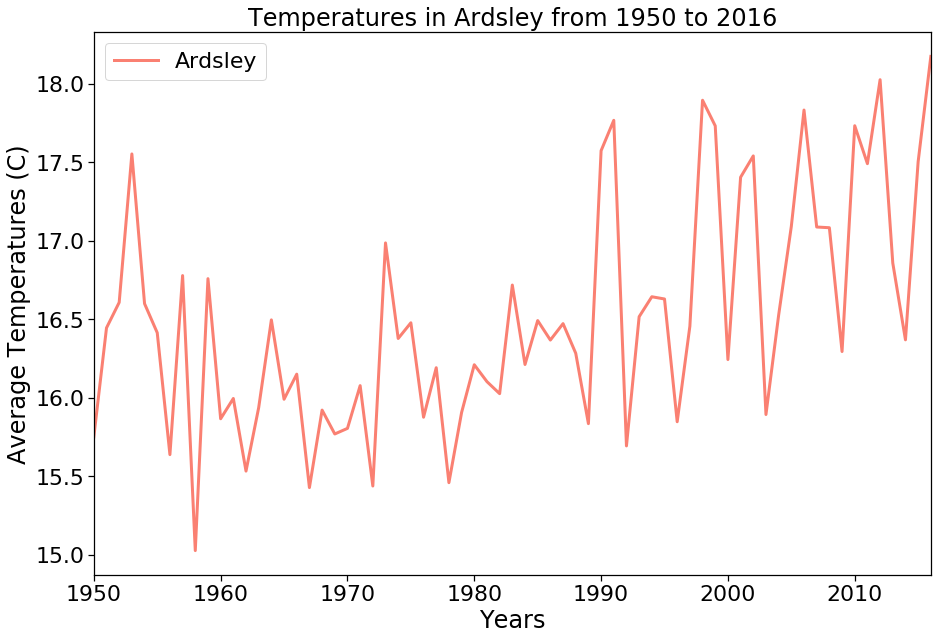

In [259]:
plt.figure(figsize=(15,10))
plt.plot(ayrs,atmax_mean_allyrs, linewidth=3,color='salmon',label='Ardsley')
plt.legend()
plt.xlim(1950,2016)
plt.ylabel('Average Temperatures (C)')
plt.xlabel('Years')
plt.title('Temperatures in Ardsley from 1950 to 2016')
plt.savefig('a_tempsallyrs.JPEG',format='jpeg')

[26.89043427 26.99728199 28.42293412 28.75967328 27.70032549 28.56706449
 27.0524994  28.24239061 26.70206466 27.83402117 27.12782557 27.61108624
 27.00184716 27.3291298  27.16076026 27.27315163 29.11891239 27.15086889
 27.5881516  27.37173856 27.75097779 27.98793411 26.35652109 28.18793421
 27.52815155 27.27739071 27.41391248 27.7244559  27.37260808 26.88097759
 28.51532536 28.04043415 26.58315156 29.07858633 27.7002169  26.85684722
 26.92249941 27.75119506 28.84869495 27.04293415 27.45380383 28.7970647
 26.24249946 28.84989061 28.30912982 28.83249938 27.02412987 27.75847758
 27.8134776  29.33510807 26.44097761 28.06597761 28.94456463 27.42662988
 27.07967333 29.35336884 28.19641238 28.11347764 28.66217313 26.81652113
 29.63912972 28.63739063 28.64804282 28.35217322 27.9508689  28.54391239
 29.48945578]



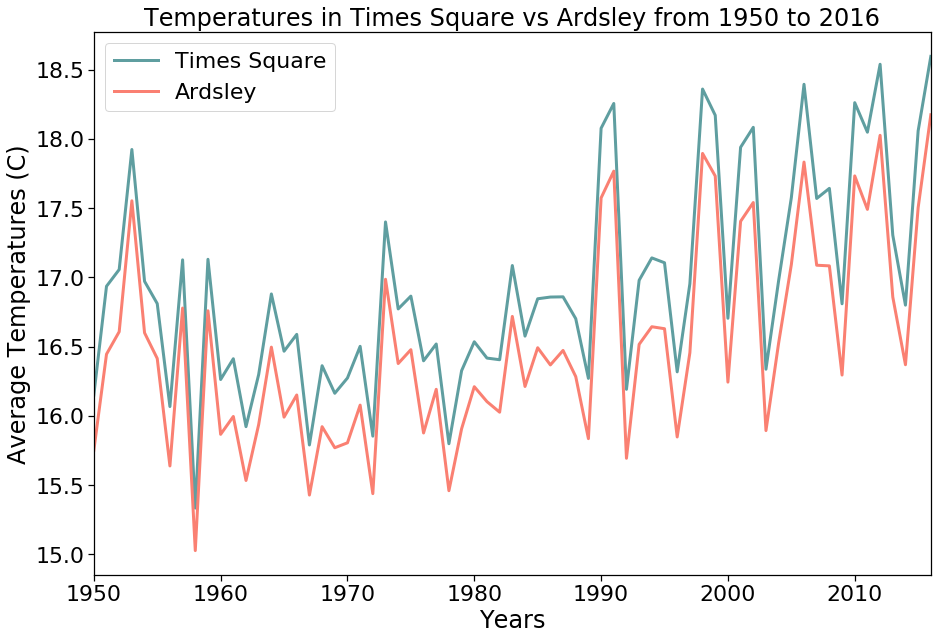

In [260]:
plt.figure(figsize=(15,10))
plt.plot(tsyrs,tstmax_mean_allyrs,linewidth=3,color='cadetblue',label='Times Square')
plt.plot(ayrs,atmax_mean_allyrs, linewidth=3,color='salmon',label='Ardsley')
plt.legend()
plt.xlim(1950,2016)
plt.ylabel('Average Temperatures (C)')
plt.xlabel('Years')
plt.title('Temperatures in Times Square vs Ardsley from 1950 to 2016')
plt.savefig('both_tempsallyrs.JPEG',format='jpeg')


print(atmax_meanJJA)
print()

In [261]:
#Times Square linreg
print(stats.linregress(tsyrs, tsmax_meanJJA))

print('Ardsley linreg',stats.linregress(ayrs, atmax_meanJJA))

LinregressResult(slope=0.01817381369909032, intercept=-7.874000904434048, rvalue=0.4025900593991475, pvalue=0.0007315784986062251, stderr=0.005125402151536771)
Ardsley linreg LinregressResult(slope=0.014749606151169315, intercept=-1.4201146582805428, rvalue=0.3432469132883759, pvalue=0.0044597444220105305, stderr=0.005006060477613046)


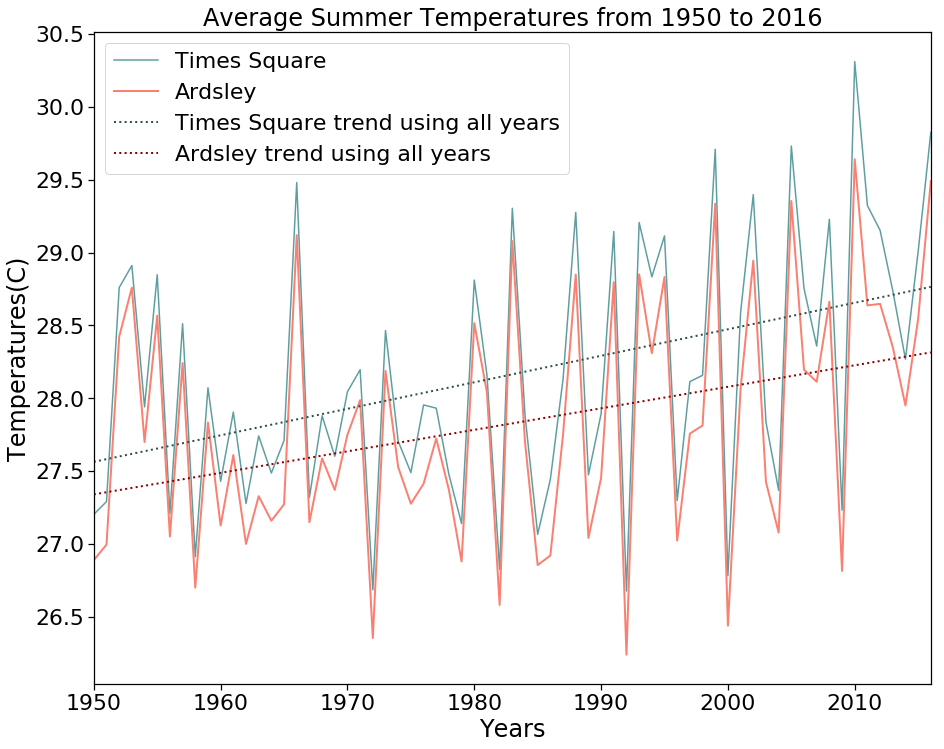

In [262]:
# Calculate JJA average maximum daily temperatures for all years
#tsmax_meanJJA = np.mean(tstmax[:,summer],axis=1)
#atmax_meanJJA = np.mean(atmax[:,summer],axis=1)

#plot trend using all yrs provided
ts_fitline_summertemps_allyrsincl= (0.01817381369909032*ayrs)-7.874000904434048

a_fitline_summertemps_allyrsincl= (0.014749606151169315*ayrs)-1.4201146582805428

#plot trend line for years after 1980
ts_fitline_summertemps=((0.03218627931761688*ayrs)-35.86412679542305)

a_fitline_summertemps=((0.02654799583004573*ayrs)-24.985687137099855)

plt.figure(figsize=(15,12))
plt.title('Average Summer Temperatures from 1950 to 2016')
plt.xlabel('Years')
plt.ylabel('Temperatures(C)')
plt.xlim(1950,2016)
plt.plot(tsyrs, tsmax_meanJJA, linewidth=1.5, color='cadetblue', label='Times Square')
plt.plot(ayrs, atmax_meanJJA, linewidth=2, color='salmon', label='Ardsley')

#plt.plot(ayrs,ts_fitline_summertemps,'--', color='darkslategrey',label='after 1980 Times Square trend')
#plt.plot(ayrs,a_fitline_summertemps,'--',color='darkred', label='after 1980 Ardsley trend')

plt.plot(ayrs,ts_fitline_summertemps_allyrsincl,':',linewidth=2, color='darkslategrey', label='Times Square trend using all years')
plt.plot(ayrs,a_fitline_summertemps_allyrsincl,':',linewidth=2, color='darkred', label='Ardsley trend using all years')
plt.legend()
plt.savefig('both_summer_tempsallyrs.JPEG',format='jpeg')

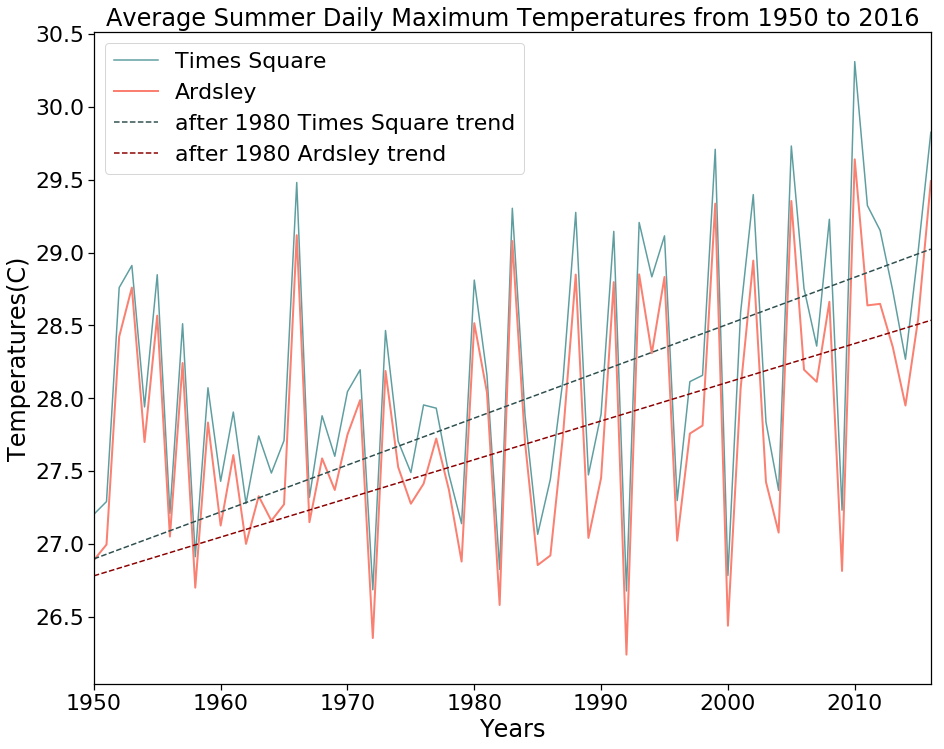

In [263]:
plt.figure(figsize=(15,12))
plt.title('Average Summer Daily Maximum Temperatures from 1950 to 2016')
plt.xlabel('Years')
plt.ylabel('Temperatures(C)')
plt.xlim(1950,2016)
plt.plot(tsyrs, tsmax_meanJJA, linewidth=1.5, color='cadetblue', label='Times Square')
plt.plot(ayrs, atmax_meanJJA, linewidth=2, color='salmon', label='Ardsley')

plt.plot(ayrs,ts_fitline_summertemps,'--', color='darkslategrey',label='after 1980 Times Square trend')
plt.plot(ayrs,a_fitline_summertemps,'--',color='darkred', label='after 1980 Ardsley trend')
plt.legend()

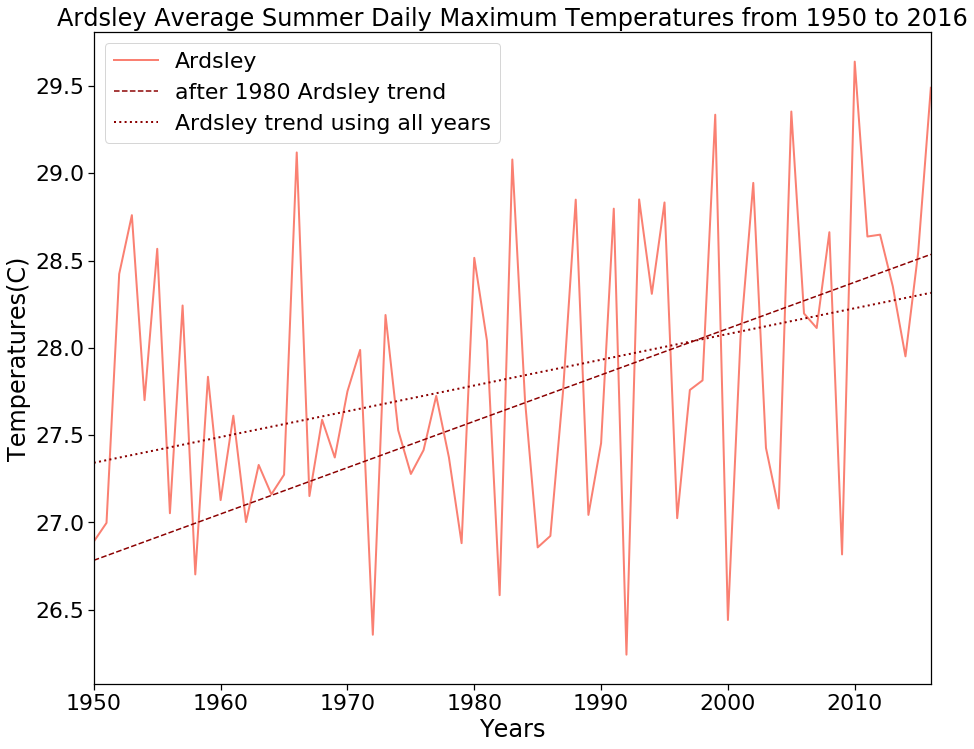

In [264]:
plt.figure(figsize=(15,12))
plt.title('Ardsley Average Summer Daily Maximum Temperatures from 1950 to 2016')
plt.xlabel('Years')
plt.ylabel('Temperatures(C)')
plt.xlim(1950,2016)
plt.plot(ayrs, atmax_meanJJA, linewidth=2, color='salmon', label='Ardsley')
plt.plot(ayrs,a_fitline_summertemps,'--',color='darkred', label='after 1980 Ardsley trend')
plt.plot(ayrs,a_fitline_summertemps_allyrsincl,':',linewidth=2, color='darkred', label='Ardsley trend using all years')
plt.legend()

plt.savefig('a_summerpredict.JPEG',format='jpeg')

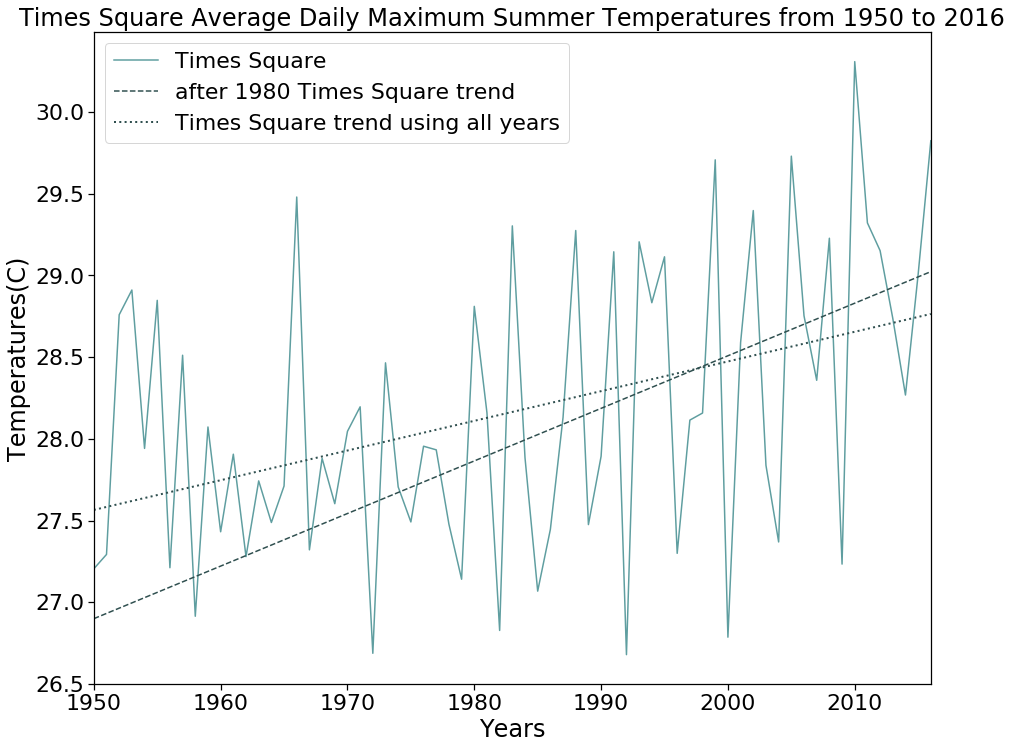

In [265]:
plt.figure(figsize=(15,12))
plt.title('Times Square Average Daily Maximum Summer Temperatures from 1950 to 2016')
plt.xlabel('Years')
plt.ylabel('Temperatures(C)')
plt.xlim(1950,2016)
plt.plot(tsyrs, tsmax_meanJJA, linewidth=1.5, color='cadetblue', label='Times Square')


plt.plot(ayrs,ts_fitline_summertemps,'--', color='darkslategrey',label='after 1980 Times Square trend')
plt.plot(ayrs,ts_fitline_summertemps_allyrsincl,':',linewidth=2, color='darkslategrey', label='Times Square trend using all years')
plt.legend()

plt.savefig('ts_summerpredict.JPEG',format='jpeg')

### create one with all yrs data, other w only after 1980
# make estimate for avera2050 using graph


In [266]:
# Trend estimate: 1980-2016
i_trend = np.where(tsyrs>=1980)[0]

print("")
print("Times Square")
print(stats.linregress(tsyrs[i_trend], tsmax_meanJJA[i_trend]))

print("")
print("ardsley")
print(stats.linregress(ayrs[i_trend], atmax_meanJJA[i_trend]))



Times Square
LinregressResult(slope=0.03218627931761688, intercept=-35.86412679542305, rvalue=0.36487865659435004, pvalue=0.026386541595714297, stderr=0.01388237169988596)

ardsley
LinregressResult(slope=0.02654799583004573, intercept=-24.985687137099855, rvalue=0.31316392864441334, pvalue=0.05911953011890903, stderr=0.013608554782248513)


# Create a predictor to determine the maximum temperature for a given year

### Times Square predictor

In [267]:
#all years included

yr_calc=2050

ts_tmax_est_allyrsinc = (0.01817381369909032*yr_calc)-7.874000904434048
print(ts_tmax_est_allyrsinc)


29.382317178701108


In [268]:
#after 1980

yr_calc=2050

ts_tmax_est = (0.03218627931761688*yr_calc)-35.86412679542305
print(ts_tmax_est)


30.117745805691555


### Ardsley predictor

In [269]:
#after 1980

yr_calc = 2050

a_tmax_est_allyrsinc = (0.02654799583004573*yr_calc)-24.985687137099855

print(a_tmax_est_allyrsinc)

29.437704314493896


In [270]:
#all yrs included.

yr_calc=2050

a_tmax_est= (0.014749606151169315*yr_calc)-1.4201146582805428

print(a_tmax_est)
#LinregressResult(slope=0.014749606151169315, intercept=-1.4201146582805428
#, rvalue=0.3432469132883759, pvalue=0.0044597444220105305, stderr=0.005006060477613046)

28.81657795161655


In [271]:
print("")
print("Times Square")
print(stats.linregress(tsyrs, tsmax_meanJJA))

print("")
print("ardsley")
print(stats.linregress(ayrs, atmax_meanJJA))




Times Square
LinregressResult(slope=0.01817381369909032, intercept=-7.874000904434048, rvalue=0.4025900593991475, pvalue=0.0007315784986062251, stderr=0.005125402151536771)

ardsley
LinregressResult(slope=0.014749606151169315, intercept=-1.4201146582805428, rvalue=0.3432469132883759, pvalue=0.0044597444220105305, stderr=0.005006060477613046)


(30,)


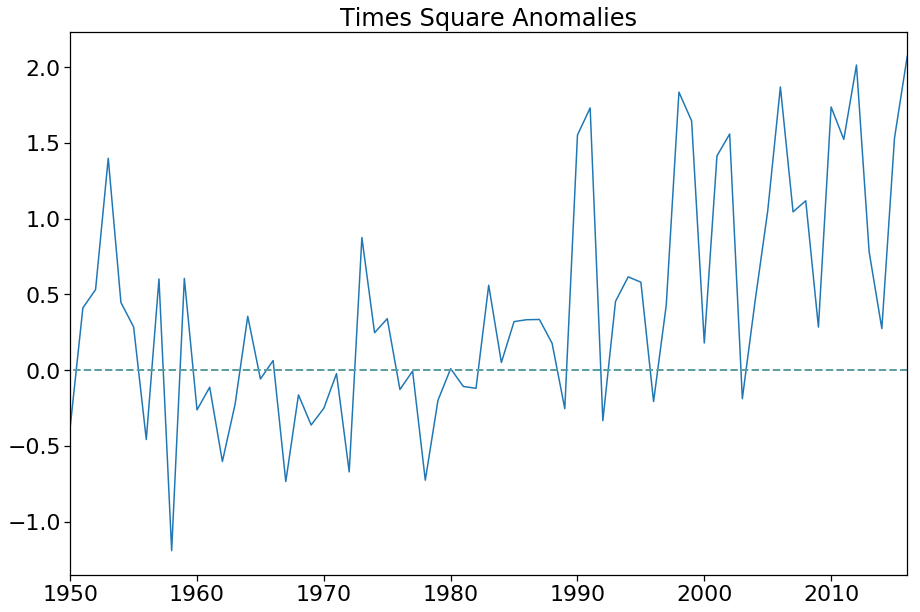

In [321]:
#find average across all years, subtract the values for averages for every year and plot
#make variable for anomalies and make it equal to temperatures minus the 

#tsmax_meanJJA = np.mean(tstmax[:,summer],axis=1)
#atmax_meanJJA = np.mean(atmax[:,summer],axis=1)


# Find where years between 1951 and 1980
i_yr = np.where(  (tsyrs>=1951) & (tsyrs<=1980)    )[0]

# Find the rows in the tmax arrays that correspond to these years
tmax_yrs1951= tstmax_mean_allyrs[i_yr]

tave1951= np.mean(tmax_yrs1951)

anomserie = tstmax_mean_allyrs-tave1951

plt.figure(figsize=(15,10))
plt.plot(tsyrs, anomserie)
plt.plot(np.array([0,2016]),np.array([0,0]),'--',color='cadetblue',linewidth=2)

plt.title('Times Square Anomalies')

plt.xlim(1950,2016)

plt.savefig('ts_tempanomalies.JPEG',format='jpeg')


print(tmax_yrs1951.shape)

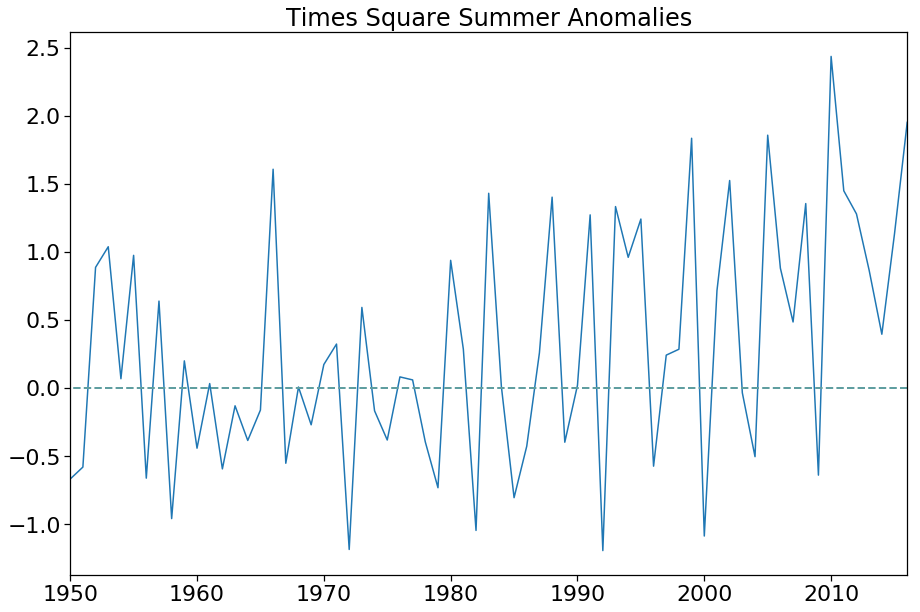

In [273]:
#find average across all years, subtract the values for averages for every year and plot
#make variable for anomalies and make it equal to temperatures minus the 

#tsmax_meanJJA = np.mean(tstmax[:,summer],axis=1)
#atmax_meanJJA = np.mean(atmax[:,summer],axis=1)


# Find where years between 1951 and 1980
i_yr = np.where(  (tsyrs>=1951) & (tsyrs<=1980)    )[0]

# Find the rows in the tmax arrays that correspond to these years
tmax_yrs1951= tsmax_meanJJA[i_yr]

tave1951= np.mean(tmax_yrs1951)

anomserie = tsmax_meanJJA-tave1951

plt.figure(figsize=(15,10))
plt.plot(tsyrs, anomserie)
plt.plot(np.array([0,2016]),np.array([0,0]),'--',color='cadetblue',linewidth=2)

plt.title('Times Square Summer Anomalies')

plt.xlim(1950,2016)

plt.savefig('ts_summer_tempanomalies.JPEG',format='jpeg')

# Find temperature anomalies for Tsq and Ardsley

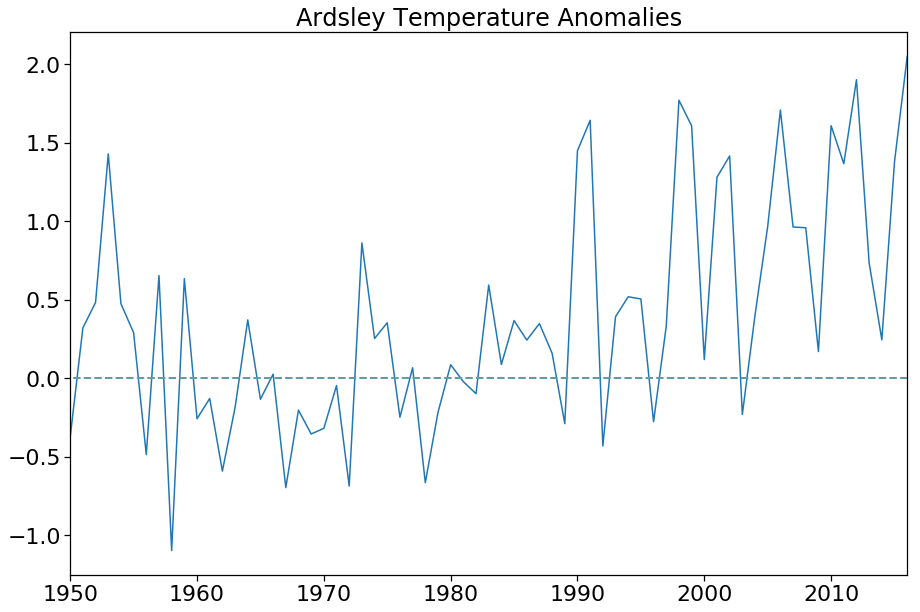

In [274]:
# Find the rows in the tmax arrays that correspond to these years
loc_yrs = np.where((ayrs>=1951) & (ayrs<=1980))[0]

a_tmax_yrs1951= atmax_mean_allyrs[loc_yrs]

a_ave1951= np.mean(a_tmax_yrs1951)

a_anomserie = atmax_mean_allyrs-a_ave1951

plt.figure(figsize=(15,10))
plt.plot(ayrs, a_anomserie)
plt.plot(np.array([0,2016]),np.array([0,0]),'--',color='cadetblue',linewidth=2)
plt.title('Ardsley Temperature Anomalies')


plt.xlim(1950,2016)

plt.savefig('a_tempanomalies.JPEG',format='jpeg')

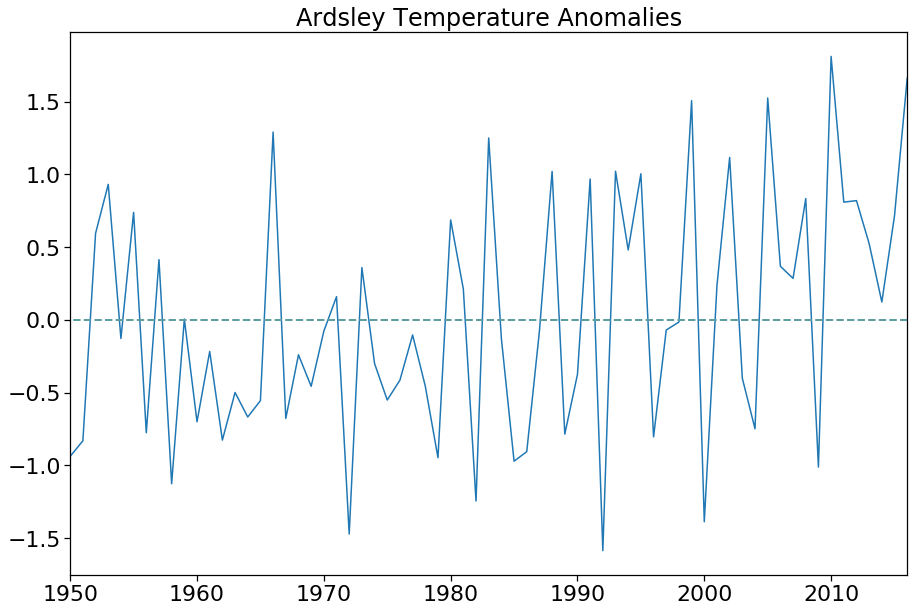

In [275]:
# Find the rows in the tmax arrays that correspond to these years
loc_yrs = np.where((ayrs>=1951) & (ayrs<=1980))[0]

a_tmax_yrs1951= [loc_yrs]

a_ave1951= np.mean(atmax_meanJJA)

a_anomserie = atmax_meanJJA-a_ave1951

plt.figure(figsize=(15,10))
plt.plot(ayrs, a_anomserie)
plt.plot(np.array([0,2016]),np.array([0,0]),'--',color='cadetblue',linewidth=2)
plt.title('Ardsley Temperature Anomalies')


plt.xlim(1950,2016)

plt.savefig('a_summer_tempanomalies.JPEG',format='jpeg')

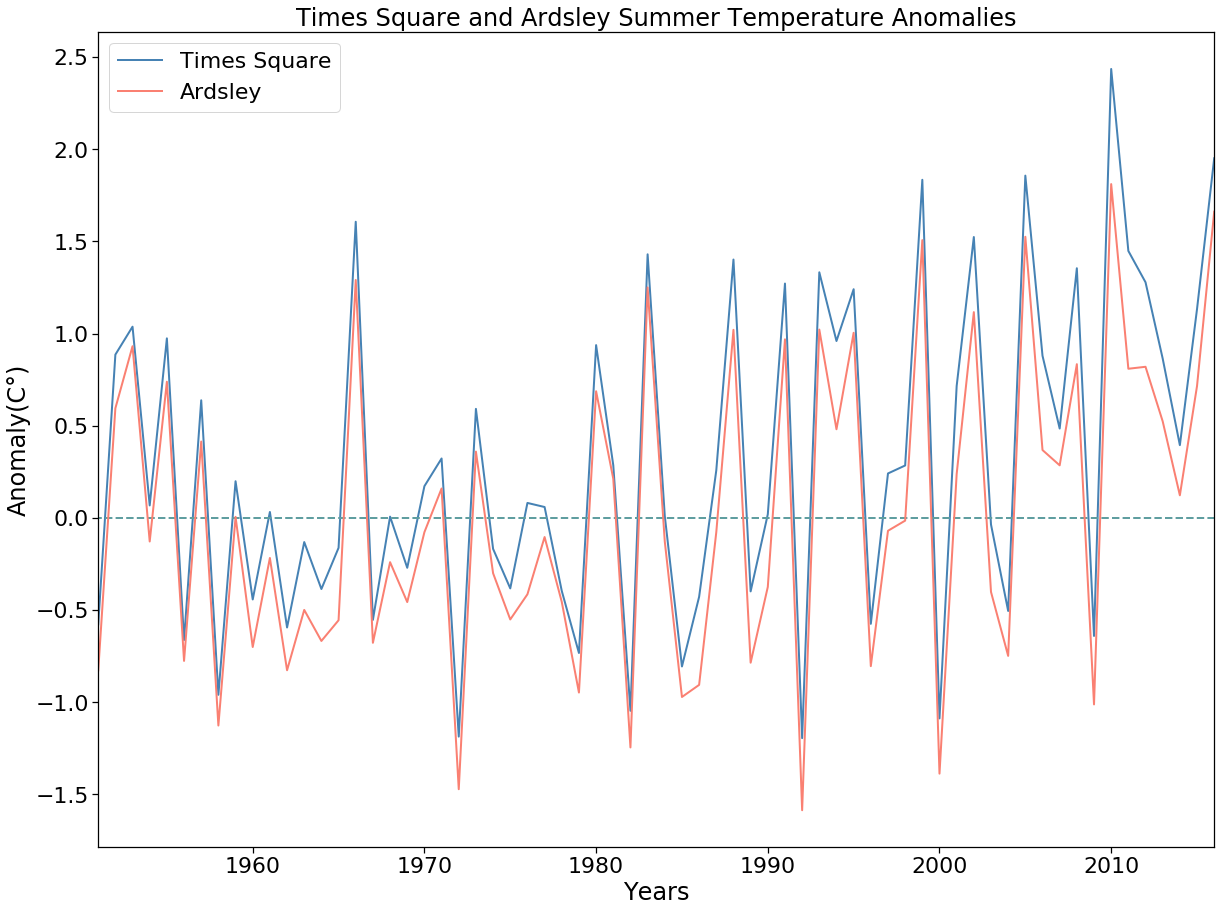

In [319]:
plt.figure(figsize=(20,15))
plt.title('Times Square and Ardsley Summer Temperature Anomalies')
plt.plot(tsyrs, anomserie, color='steelblue',linewidth=2, label='Times Square')
plt.plot(np.array([0,2016]),np.array([0,0]),'--',color='cadetblue',linewidth=2)
plt.plot(ayrs, a_anomserie, color='salmon',linewidth=2, label='Ardsley')
plt.legend()
plt.xlim(1951,2016)
plt.xlabel('Years')
plt.ylabel('Anomaly(C°)')

plt.savefig('both_tempanomalies.JPEG',format='jpeg')

In [293]:
#linreg for ts and ardsley anomalies

#times square anomalies
regstat_ts_anomalies = stats.linregress(tsyrs, anomserie)
ts_anomalies_fit_line = (regstat_ts_anomalies.slope*tsyrs)+regstat_ts_anomalies.intercept
print('Times Square anomaly linreg:     ',regstat_ts_anomalies)

#ardsley anomalies
regstat_a_anomalies = stats.linregress(ayrs, a_anomserie)
a_anomalies_fit_line = (regstat_a_anomalies.slope*tsyrs)+regstat_a_anomalies.intercept
print('Ardsley anomaly linreg model:    ',regstat_a_anomalies)



Times Square anomaly linreg:      LinregressResult(slope=0.018173813699090324, intercept=-35.747637982207884, rvalue=0.40259005939914755, pvalue=0.0007315784986062251, stderr=0.005125402151536771)
Ardsley anomaly linreg model:     LinregressResult(slope=0.014749606151169315, intercept=-29.248468997768743, rvalue=0.3432469132883759, pvalue=0.0044597444220105305, stderr=0.005006060477613046)


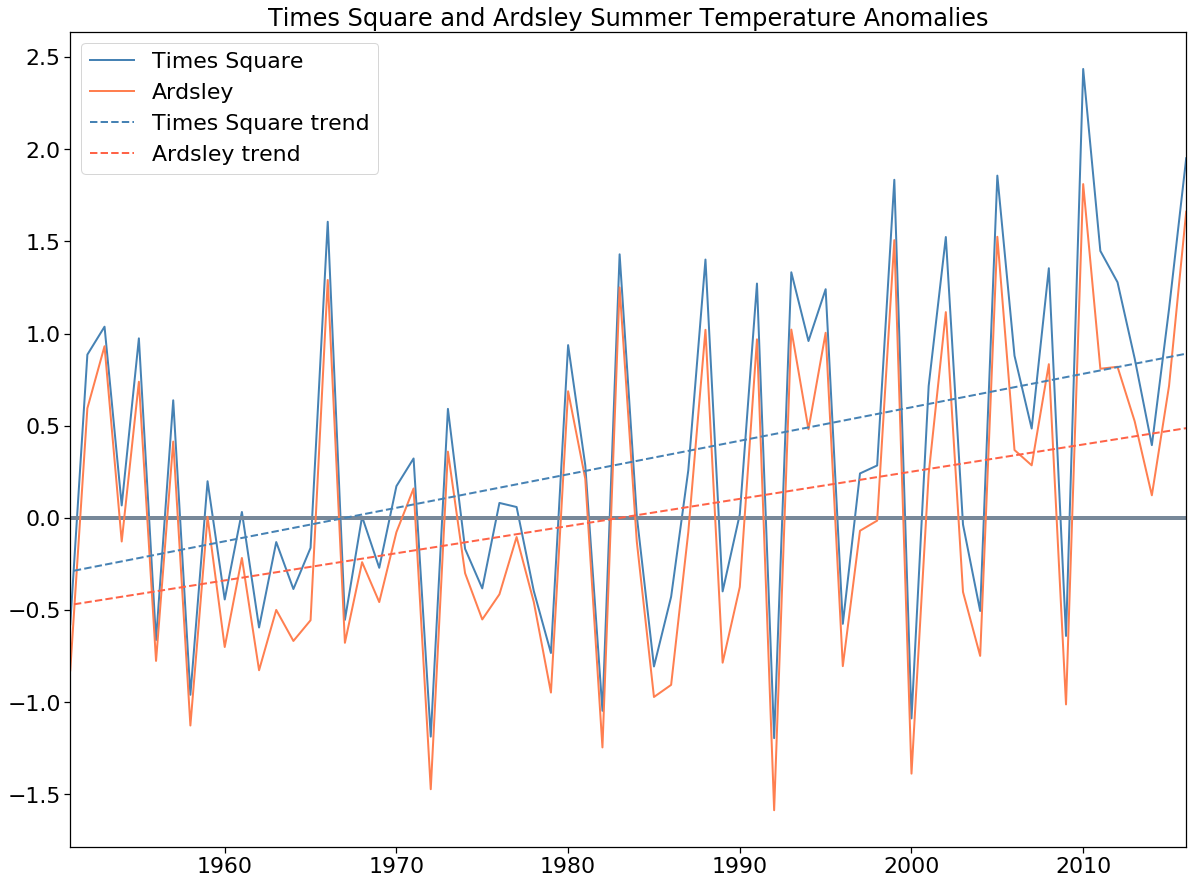

In [317]:
plt.figure(figsize=(20,15))
plt.title('Times Square and Ardsley Summer Temperature Anomalies')
plt.plot(tsyrs, anomserie, color='steelblue',linewidth=2, label='Times Square')
plt.plot(np.array([0,2016]),np.array([0,0]),'-',color='lightslategray',linewidth=4)
plt.plot(ayrs, a_anomserie, color='coral',linewidth=2, label='Ardsley')
plt.legend()
plt.xlim(1951,2016)

plt.plot(ayrs,ts_anomalies_fit_line,'--', linewidth=2, color='steelblue',label='Times Square trend')
plt.plot(ayrs,a_anomalies_fit_line,'--',linewidth=2, color='tomato', label='Ardsley trend')
plt.legend()


plt.savefig('both_tempanomalies_withlinreg.JPEG',format='jpeg')

# Find first heat day of the year for Tsq and Ardsley

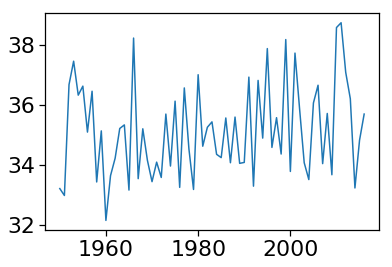

In [278]:
# x-axis: day of yr, y-axis: min, max temp for every yr

#a_maxtemps_allyrs= np.zeros((ayrs.size))

# Create a storage variable for our annual mean Tmax values
ts_maxtemps_allyrs = np.zeros((ayrs.size)) #size of yrs should = size of zeros


for i_tsyrs in enumerate(tsyrs):
    
    # Location of all data for the current year
    loc_tsyrs = i_tsyrs[0]
    
    #Pull out the temperature data for the current year
    tstmax_tsyrs = tstmax[loc_tsyrs,:]

    # Calculate the mean
    tstmax_yrmax = np.nanmax(tstmax_tsyrs)
    
    # Store the current year estimate in our full array
    ts_maxtemps_allyrs[loc_tsyrs]=tstmax_yrmax

plt.plot(tsyrs,ts_maxtemps_allyrs)


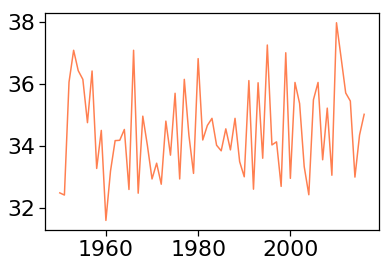

In [279]:
# Create a storage variable for our annual mean Tmax values
a_maxtemps_allyrs = np.zeros((ayrs.size)) #size of yrs should = size of zeros


for i_ayrs in enumerate(ayrs):
    
    # Location of all data for the current year
    loc_ayrs = i_ayrs[0]
    
    #Pull out the temperature data for the current year
    atmax_ayrs = atmax[loc_ayrs,:]

    # Calculate the mean
    atmax_yrmax = np.nanmax(atmax_ayrs)
    
    # Store the current year estimate in our full array
    a_maxtemps_allyrs[loc_ayrs]=atmax_yrmax

plt.plot(ayrs,a_maxtemps_allyrs,color = 'coral')



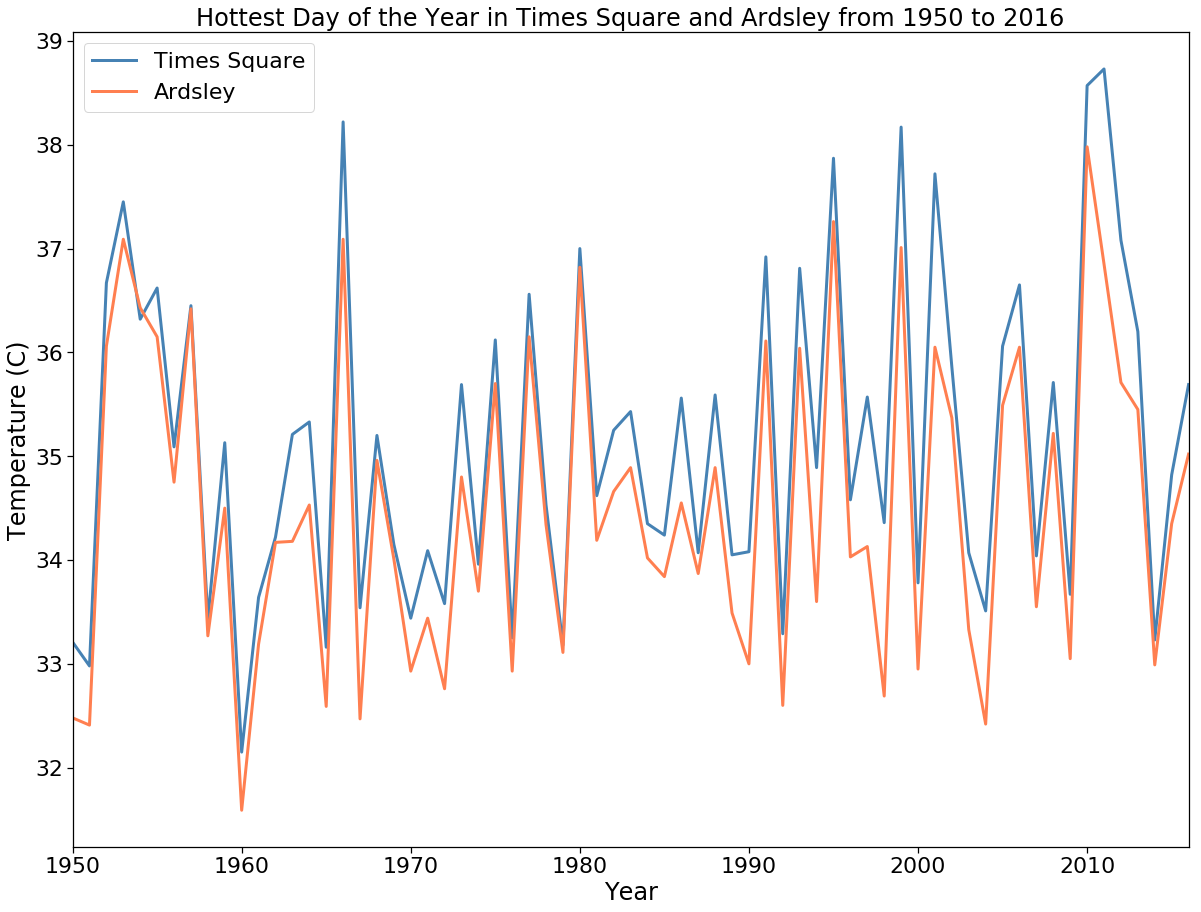

In [280]:

plt.figure(figsize=(20,15))
plt.ylabel('Temperature (C)')
plt.xlabel('Year')
plt.title('Hottest Day of the Year in Times Square and Ardsley from 1950 to 2016')
plt.plot(tsyrs,ts_maxtemps_allyrs,linewidth=3, color='steelblue',label='Times Square')
plt.plot(ayrs,a_maxtemps_allyrs,linewidth=3, color = 'coral', label = 'Ardsley')
plt.legend()
plt.xlim(1950,2016)
plt.savefig('both_hottestdoyallyrs.JPEG',format='jpeg')

## First heat day of the year for all years using 90th percentile threshold

[147 149 188 189 196 197 198 199 200 203 204 205 206 207 208 209 210 224
 225 226 227 228 239 242 253 258]


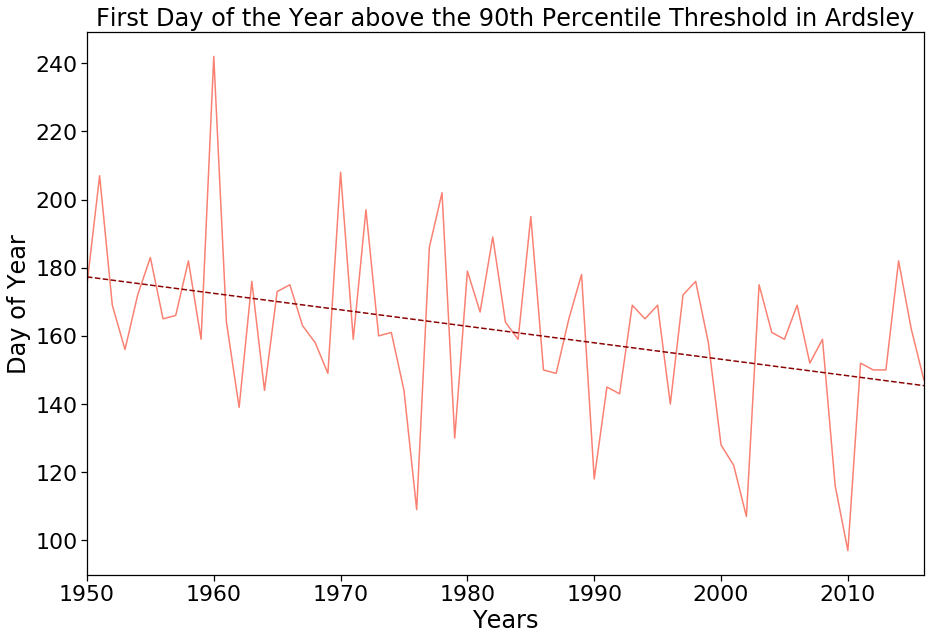

In [281]:
#y-axis: day of the year out of 366 ; x-axis: year from 1950-2016

loc_days = np.where(a_curr_year>=a_thresh_90)[0]

print(adoy[loc_days])

np.min(adoy[loc_days])

a_firstday_abovethresh90 = np.zeros((ayrs.size))

for i_yr in enumerate(ayrs):

    a_curr_year = atmax[i_yr[0],:]
    
    loc_days = np.where(a_curr_year>=a_thresh_90)
    
    first_day = np.min(adoy[loc_days])
    
    a_firstday_above_threshold[i_yr[0]] = first_day

a_trendsstats = stats.linregress(ayrs, a_firstday_above_threshold) 
a_trends_fitline = (a_trendsstats.slope*ayrs)+a_trendsstats.intercept


#a_fit_line = (a_regstat_heatdays.slope*amax_meanJJA)+a_regstat_heatdays.intercept
#plt.plot(amax_meanJJA,a_fit_line, color='salmon')


plt.figure(figsize=(15,10))
plt.xlim(1950,2016)
plt.plot(ayrs, a_firstday_above_threshold, color='salmon')
plt.plot(ayrs, a_trends_fitline, '--', color='darkred')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.title('First Day of the Year above the 90th Percentile Threshold in Ardsley')

plt.savefig('a_1stdayabove90thresh.JPEG',format='jpeg')

In [282]:
a_trendsstats.slope

print(a_trendsstats)

LinregressResult(slope=-0.4835182376885625, intercept=1120.1748742916434, rvalue=-0.38019961678451214, pvalue=0.0015056552447629034, stderr=0.1458953257763527)


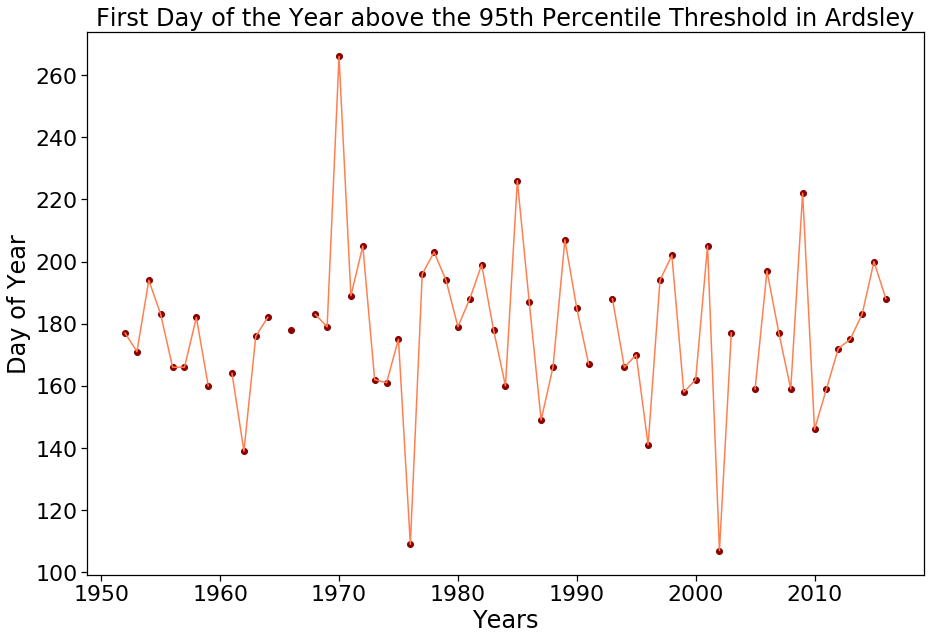

In [283]:
#y-axis: day of the year out of 366 ; x-axis: year from 1950-2016

loc_days95 = np.where(a_curr_year>=a_heatthresh_95)[0]

#print(adoy[loc_days95])
#np.min(adoy[loc_days95])

a_firstday_abovethresh95 = np.zeros((ayrs.size))

for i_yr in enumerate(ayrs):

    a_curr_year95 = atmax[i_yr[0],:]
    
    loc_days95 = np.where(a_curr_year95>=a_heatthresh_95)
    
    if adoy[loc_days95].size==0:
        first_day95 = np.nan
    else:
        first_day95 = np.min(adoy[loc_days95])
    
    a_firstday_abovethresh95[i_yr[0]] = first_day95

#a_trendsstats95 = stats.linregress(ayrs, a_firstday_abovethresh95) 
#a_trends_fitline95 = (a_trendsstats95.slope*ayrs)+a_trendsstats95.intercept


#a_fit_line = (a_regstat_heatdays.slope*amax_meanJJA)+a_regstat_heatdays.intercept
#plt.plot(amax_meanJJA,a_fit_line, color='salmon')


plt.figure(figsize=(15,10))
plt.scatter(ayrs, a_firstday_abovethresh95, color='darkred')
plt.plot(ayrs, a_firstday_abovethresh95, color='coral')
#plt.plot(ayrs, a_trends_fitline95, '--', color='cadetblue')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.title('First Day of the Year above the 95th Percentile Threshold in Ardsley')
plt.savefig('a_1stdayabove95thresh.JPEG',format='jpeg')

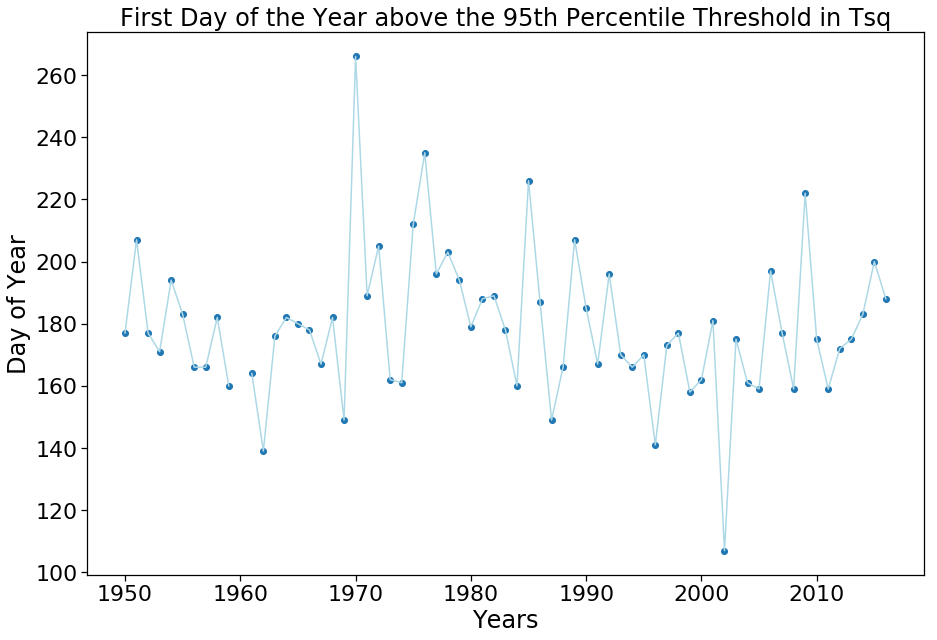

In [284]:
#y-axis: day of the year out of 366 ; x-axis: year from 1950-2016

ts_loc_days95 = np.where(curr_year>=ts_heatthresh_95)[0]

#print(adoy[loc_days95])
#np.min(adoy[loc_days95])

ts_firstday_abovethresh95 = np.zeros((ayrs.size))

for i_yr in enumerate(tsyrs):

    ts_curr_year95 = tstmax[i_yr[0],:]
    
    ts_loc_days95 = np.where(ts_curr_year95>=ts_heatthresh_95)
    
    if tsdoy[ts_loc_days95].size==0:
        ts_first_day95 = np.nan
    else:
        ts_first_day95 = np.min(tsdoy[ts_loc_days95])
    
    ts_firstday_abovethresh95[i_yr[0]] = ts_first_day95

#a_trendsstats95 = stats.linregress(ayrs, a_firstday_abovethresh95) 
#a_trends_fitline95 = (a_trendsstats95.slope*ayrs)+a_trendsstats95.intercept


#a_fit_line = (a_regstat_heatdays.slope*amax_meanJJA)+a_regstat_heatdays.intercept
#plt.plot(amax_meanJJA,a_fit_line, color='salmon')


plt.figure(figsize=(15,10))
plt.scatter(tsyrs, ts_firstday_abovethresh95)
plt.plot(tsyrs, ts_firstday_abovethresh95, color='lightblue')
#plt.plot(ayrs, a_trends_fitline95, '--', color='cadetblue')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.title('First Day of the Year above the 95th Percentile Threshold in Tsq')

#save
plt.savefig('tsq_1stdayabove95thresh.JPEG',format='jpeg')

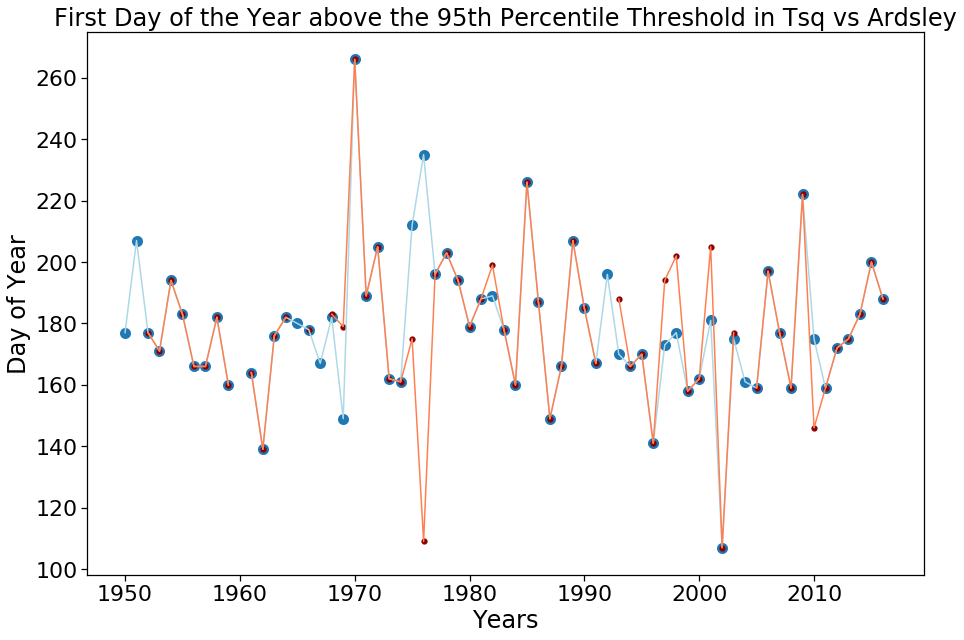

In [285]:
plt.figure(figsize=(15,10))
plt.scatter(tsyrs, ts_firstday_abovethresh95, linewidth=5)
plt.plot(tsyrs, ts_firstday_abovethresh95, color='lightblue')
plt.scatter(ayrs, a_firstday_abovethresh95, color='darkred', linewidth=.2)
plt.plot(ayrs, a_firstday_abovethresh95, color='coral')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.title('First Day of the Year above the 95th Percentile Threshold in Tsq vs Ardsley')

#save
plt.savefig('both_1stdayabove95thresh.JPEG',format='jpeg')

LinregressResult(slope=-0.26255088195386705, intercept=686.6533242876527, rvalue=-0.22096641759509844, pvalue=0.07234616165326846, stderr=0.1437343196557904)


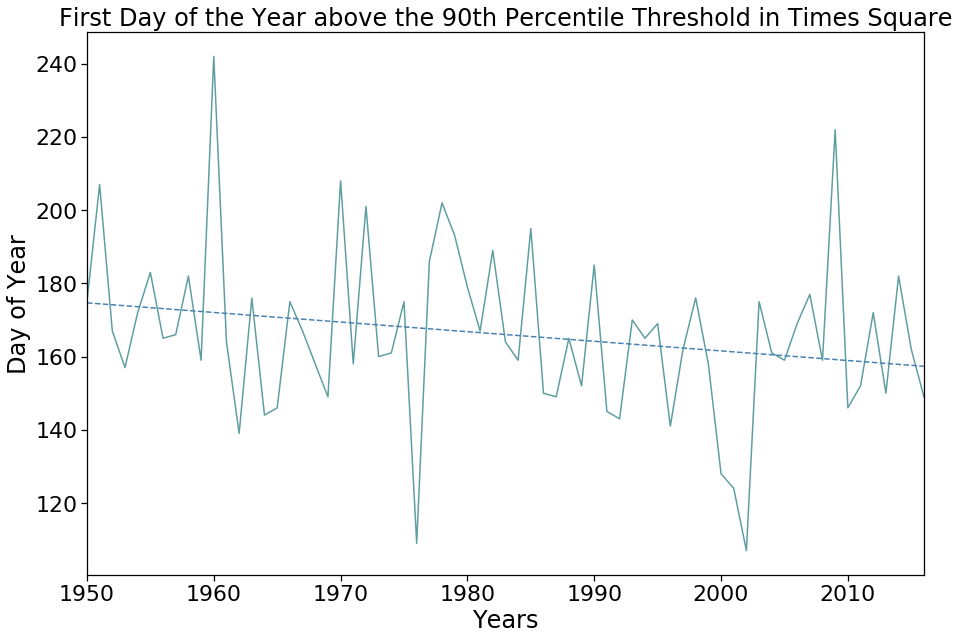

In [286]:
ts_trendsstats = stats.linregress(ayrs, ts_firstday_above_threshold) 
ts_trends_fitline = (ts_trendsstats.slope*ayrs)+ts_trendsstats.intercept

plt.figure(figsize=(15,10))
plt.xlim(1950,2016)
plt.plot(ayrs, ts_firstday_above_threshold, color='cadetblue')
plt.plot(ayrs, ts_trends_fitline, '--', color='steelblue')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.title('First Day of the Year above the 90th Percentile Threshold in Times Square')

#save
plt.savefig('tsq_1stdoyabove90thredh.JPEG',format='jpeg')
print(ts_trendsstats)

In [287]:
ts_trendsstats

LinregressResult(slope=-0.26255088195386705, intercept=686.6533242876527, rvalue=-0.22096641759509844, pvalue=0.07234616165326846, stderr=0.1437343196557904)

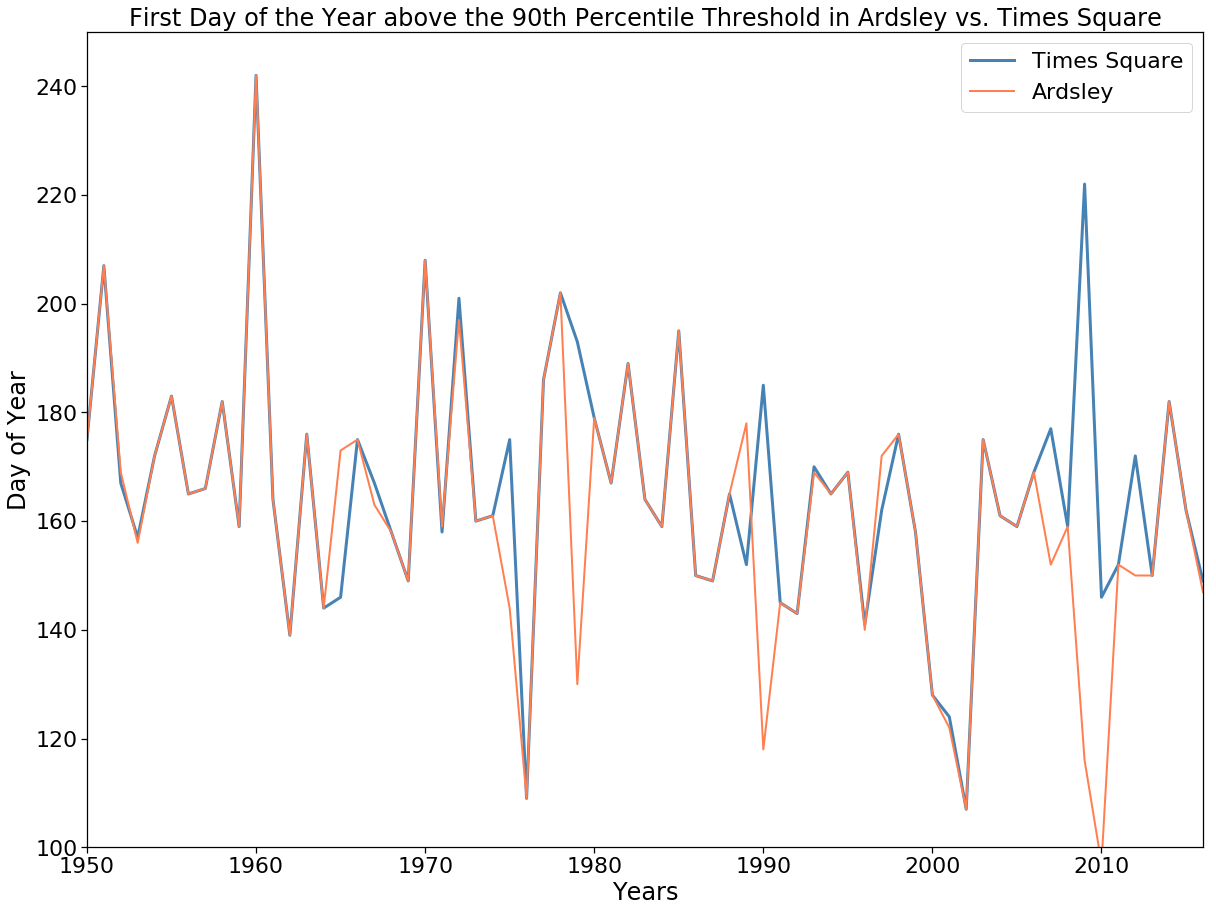

In [288]:
plt.figure(figsize=(20,15))
plt.xlim(1950,2016)
plt.ylim(100,250)
plt.plot(ayrs, ts_firstday_above_threshold,linewidth=3, color = 'steelblue',label='Times Square')
plt.plot(ayrs, a_firstday_above_threshold,linewidth=2, color = 'coral', label='Ardsley')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.title('First Day of the Year above the 90th Percentile Threshold in Ardsley vs. Times Square')

plt.savefig('both_1stdoy_90.JPEG',format='jpeg')

In [289]:
print(ayrs)

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [290]:
-0.38019961678451214**2

-0.1445517486030899

In [291]:
-0.4835182376885625*67

-32.395721925133685